# Digital Bank Loan Approval Prediction (Data Exploration Section)

### About the dataset
The dataset is taken from [Kaggle](https://www.kaggle.com/competitions/ml-olympiad-ai-ml-malaysia/data). The dataset is a sample of Digital Bank Marketing Funnel Micro Loan dataset. Based on the dataset, build a prediction model to predict loan approval status.

### Columns  
| # | Description |
| --- | --- |
| id | Customer ID |
| 02 | Gender (categorical) |
| 03 | Date of Birth of the applicant |
| 04 | Lead Creation Date |
| 05 | City Code (categorical) |
| 06 | Area Code (categorical) | 
| 07 | Employer Code (categorical) |
| 08 | Employer Category1 (categorical) |
| 09 | Employer Category2 (categorical) |
| 10 | Monthly Income |
| 11 | Bank Code |
| 12 | Bank Account Type (categorical) |
| 13 | Marketing Source (categorical) |
| 14 | Marketing_Category1 (categorical) |
| 15 | Marketing_Category2 (categorical) |
| 16 | Current Loan Installment |
| 17 | Requested Loan Amount |
| 18 | Loan Repayment (Years) |
| 19 | Interest Rate |
| 20 | Requested Loan Installment |

class : Loan Approval Status (Yes=1, No=0)

# Imports and Read Data

In [85]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

df_train.head()

,id,02,03,04,05,06,07,08,09,10,...,12,13,14,15,16,17,18,19,20,class
0,-2267620335683202440,0,1992-08-19,2016-07-26,4195062457429987311,1.0,5451653042631526903,2.0,4.0,2415.0,...,2.0,5,3,4,0.00,40950.0,5.0,NaN,0.00,0
1,6983777496993703358,1,1975-03-17,2016-02-14,-6228735452334436716,3.0,8322794614403,NaN,NaN,2625.0,...,NaN,1,7,0,0.00,NaN,NaN,NaN,0.00,0
2,-9000875829172115247,1,1983-04-07,2016-07-27,4195062457429987311,1.0,7958738730440449375,2.0,4.0,6772.5,...,1.0,4,2,10,2063.04,21000.0,5.0,15.19,2063.04,0
3,4577133526371079450,0,1975-01-23,2016-08-23,630300624900511972,1.0,-5322077886952523742,1.0,3.0,7980.0,...,1.0,4,2,10,1575.00,NaN,NaN,NaN,1575.00,0
4,5683986052858780477,0,1994-06-27,2016-07-21,4195062457429987311,1.0,-974246632625402816,2.0,4.0,945.0,...,1.0,4,3,0,0.00,NaN,NaN,NaN,0.00,0


In [87]:
rename = {
        '02': 'Gender', '03': 'Date Of Birth',
        '04': 'Lead Creation Date','05': 'City Code',
        '06': 'Area Code','07': 'Employer Code',
        '08': 'Employer Category1','09': 'Employer Category2',
        '10': 'Monthly Income','11': 'Bank Code',
        '12': 'Bank Account Type','13': 'Marketing Source',
        '14': 'Marketing Category1','15': 'Marketing Category2',
        '16': 'Current Loan Installment','17': 'Requested Loan Amount',
        '18': 'Loan Repayment (Years)','19': 'Interest Rate',
        '20': 'Requested Loan Installment'
        }

In [88]:
df = df_train.copy()

In [89]:
df = df.rename(columns=rename)

In [90]:
df.shape

(55760, 21)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55760 entries, 0 to 55759
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          55760 non-null  int64  
 1   Gender                      55760 non-null  int64  
 2   Date Of Birth               55752 non-null  object 
 3   Lead Creation Date          55760 non-null  object 
 4   City Code                   55760 non-null  int64  
 5   Area Code                   55102 non-null  float64
 6   Employer Code               55760 non-null  int64  
 7   Employer Category1          52567 non-null  float64
 8   Employer Category2          52336 non-null  float64
 9   Monthly Income              55760 non-null  float64
 10  Bank Code                   55760 non-null  int64  
 11  Bank Account Type           48289 non-null  float64
 12  Marketing Source            55760 non-null  int64  
 13  Marketing Category1         557

* 03 and 04 need to be converted to datetime

In [92]:
df.describe()

,id,Gender,City Code,Area Code,Employer Code,Employer Category1,Employer Category2,Monthly Income,Bank Code,Bank Account Type,Marketing Source,Marketing Category1,Marketing Category2,Current Loan Installment,Requested Loan Amount,Loan Repayment (Years),Interest Rate,Requested Loan Installment,class
count,5.576000e+04,55760.000000,5.576000e+04,55102.000000,5.576000e+04,52567.000000,52336.000000,5.576000e+04,5.576000e+04,48289.000000,55760.000000,55760.000000,55760.000000,55719.000000,33629.000000,33629.000000,17819.000000,55719.000000,55760.000000
mean,2.449062e+16,0.572956,9.640551e+16,1.447497,5.291364e+15,1.709552,3.721454,6.211983e+03,-1.740559e+18,1.343722,3.123691,4.150000,3.944351,379.255597,41437.704065,3.893158,18.851619,379.255597,0.015136
std,5.343383e+18,0.494653,4.098920e+18,0.767264,5.164233e+18,0.800490,0.805083,2.034534e+05,4.182682e+18,0.474955,2.820992,2.305282,3.816831,2638.527522,32322.161373,1.165489,5.746168,2638.527522,0.122096
min,-9.223214e+18,0.000000,-9.223032e+18,1.000000,-9.220672e+18,1.000000,1.000000,0.000000e+00,-9.141340e+18,1.000000,1.000000,1.000000,0.000000,0.000000,5250.000000,1.000000,11.750200,0.000000,0.000000
25%,-4.644573e+18,0.000000,-4.630370e+18,1.000000,-4.252525e+18,1.000000,4.000000,1.732500e+03,-5.682067e+18,1.000000,1.000000,2.000000,0.000000,0.000000,21000.000000,3.000000,14.945000,0.000000,0.000000
50%,7.476829e+16,1.000000,6.303006e+17,1.000000,8.322795e+12,1.000000,4.000000,2.625000e+03,-2.629565e+18,1.000000,3.000000,3.000000,2.000000,0.000000,31500.000000,4.000000,17.640000,0.000000,0.000000
75%,4.666191e+18,1.000000,3.466153e+18,2.000000,4.380562e+18,2.000000,4.000000,4.200000e+03,8.322795e+12,2.000000,4.000000,7.000000,7.000000,367.500000,52500.000000,5.000000,19.600000,367.500000,0.000000
max,9.223304e+18,1.000000,9.171856e+18,3.000000,9.223290e+18,3.000000,4.000000,4.030303e+07,8.776225e+18,2.000000,28.000000,7.000000,10.000000,572708.325000,315000.000000,5.000000,36.260000,572708.325000,1.000000


In [93]:
df.isnull().sum()

id                                0
Gender                            0
Date Of Birth                     8
Lead Creation Date                0
City Code                         0
Area Code                       658
Employer Code                     0
Employer Category1             3193
Employer Category2             3424
Monthly Income                    0
Bank Code                         0
Bank Account Type              7471
Marketing Source                  0
Marketing Category1               0
Marketing Category2               0
Current Loan Installment         41
Requested Loan Amount         22131
Loan Repayment (Years)        22131
Interest Rate                 37941
Requested Loan Installment       41
class                             0
dtype: int64

* There are minor missing data for 03 (birth of date).
* So many missing values. Need to handle selectively. Maybe use KNN imputation for these.

In [94]:
df.duplicated().sum()

0

In [95]:
df.nunique()

id                            55760
Gender                            2
Date Of Birth                 10161
Lead Creation Date               92
City Code                       656
Area Code                         3
Employer Code                 30756
Employer Category1                3
Employer Category2                4
Monthly Income                 4308
Bank Code                        58
Bank Account Type                 2
Marketing Source                 28
Marketing Category1               7
Marketing Category2               5
Current Loan Installment       2802
Requested Loan Amount           188
Loan Repayment (Years)            5
Interest Rate                    72
Requested Loan Installment     2802
class                             2
dtype: int64

In [96]:
def summary_df(df:pd.DataFrame) -> pd.DataFrame:
    """
    Generates a summary of the DataFrame including data types, counts, unique values,
    percentages of unique values, null counts, percentages of null values, and basic 
    statistics for numeric columns.

    Parameters:
    df (pd.DataFrame): The DataFrame to summarize.

    Returns:
    pd.DataFrame: Summary DataFrame.
    """
    df_copy = df.copy()
    
    # Initialize an empty DataFrame to store summary information
    desc = pd.DataFrame(index=list(df_copy))

    desc['type'] = df_copy.dtypes
    desc['count'] = df_copy.count()
    desc['nunique'] = df_copy.nunique()
    desc['%unique'] = desc['nunique'] / len(df_copy) * 100
    desc['null'] = df_copy.isnull().sum()
    desc['%null'] = desc['null'] / len(df_copy) * 100
    
    # Concatenate summary statistics for numeric columns
    desc = pd.concat([desc, df_copy.describe().T.drop('count', axis=1)], axis=1)
    desc = desc.sort_values(by=['type', 'null'])
    
    return desc

In [97]:
desc_df = summary_df(df)
desc_df.style.background_gradient()

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
id,int64,55760,55760,100.000000,0,0.000000,24490616075323672.000000,5343382752499337216.000000,-9223213605693340672.000000,-4644572516381079552.000000,74768291849894672.000000,4666190918355095552.000000,9223303970012478464.000000
Gender,int64,55760,2,0.003587,0,0.000000,0.572956,0.494653,0.000000,0.000000,1.000000,1.000000,1.000000
City Code,int64,55760,656,1.176471,0,0.000000,96405512560870144.000000,4098920419895958016.000000,-9223031804108760064.000000,-4630370090178117632.000000,630300624900512000.000000,3466152762937442816.000000,9171856440012806144.000000
Employer Code,int64,55760,30756,55.157819,0,0.000000,5291364024207885.000000,5164233044169923584.000000,-9220672462291360768.000000,-4252525400179148800.000000,8322794614403.000000,4380561651639923200.000000,9223290489019473920.000000
Bank Code,int64,55760,58,0.104017,0,0.000000,-1740558534080662784.000000,4182681645717180416.000000,-9141340066915831808.000000,-5682066992016760832.000000,-2629564825712250368.000000,8322794614403.000000,8776224868752183296.000000
Marketing Source,int64,55760,28,0.050215,0,0.000000,3.123691,2.820992,1.000000,1.000000,3.000000,4.000000,28.000000
Marketing Category1,int64,55760,7,0.012554,0,0.000000,4.150000,2.305282,1.000000,2.000000,3.000000,7.000000,7.000000
Marketing Category2,int64,55760,5,0.008967,0,0.000000,3.944351,3.816831,0.000000,0.000000,2.000000,7.000000,10.000000
class,int64,55760,2,0.003587,0,0.000000,0.015136,0.122096,0.000000,0.000000,0.000000,0.000000,1.000000
Monthly Income,float64,55760,4308,7.725968,0,0.000000,6211.983161,203453.398344,0.000000,1732.500000,2625.000000,4200.000000,40303030.215000


### Obeservations
* There are minor missing data for Date Of Birth, Current Loan Installment, Requested Loan Installment.
* Average missing data for Area Code, Employer Category1, Employer Category2, Bank Account Type.
* Major missing data for Requested Loan Amount, Loan Repayment (Years), Interest Rate

# Data Exploration

## 01. General All Data Distribution

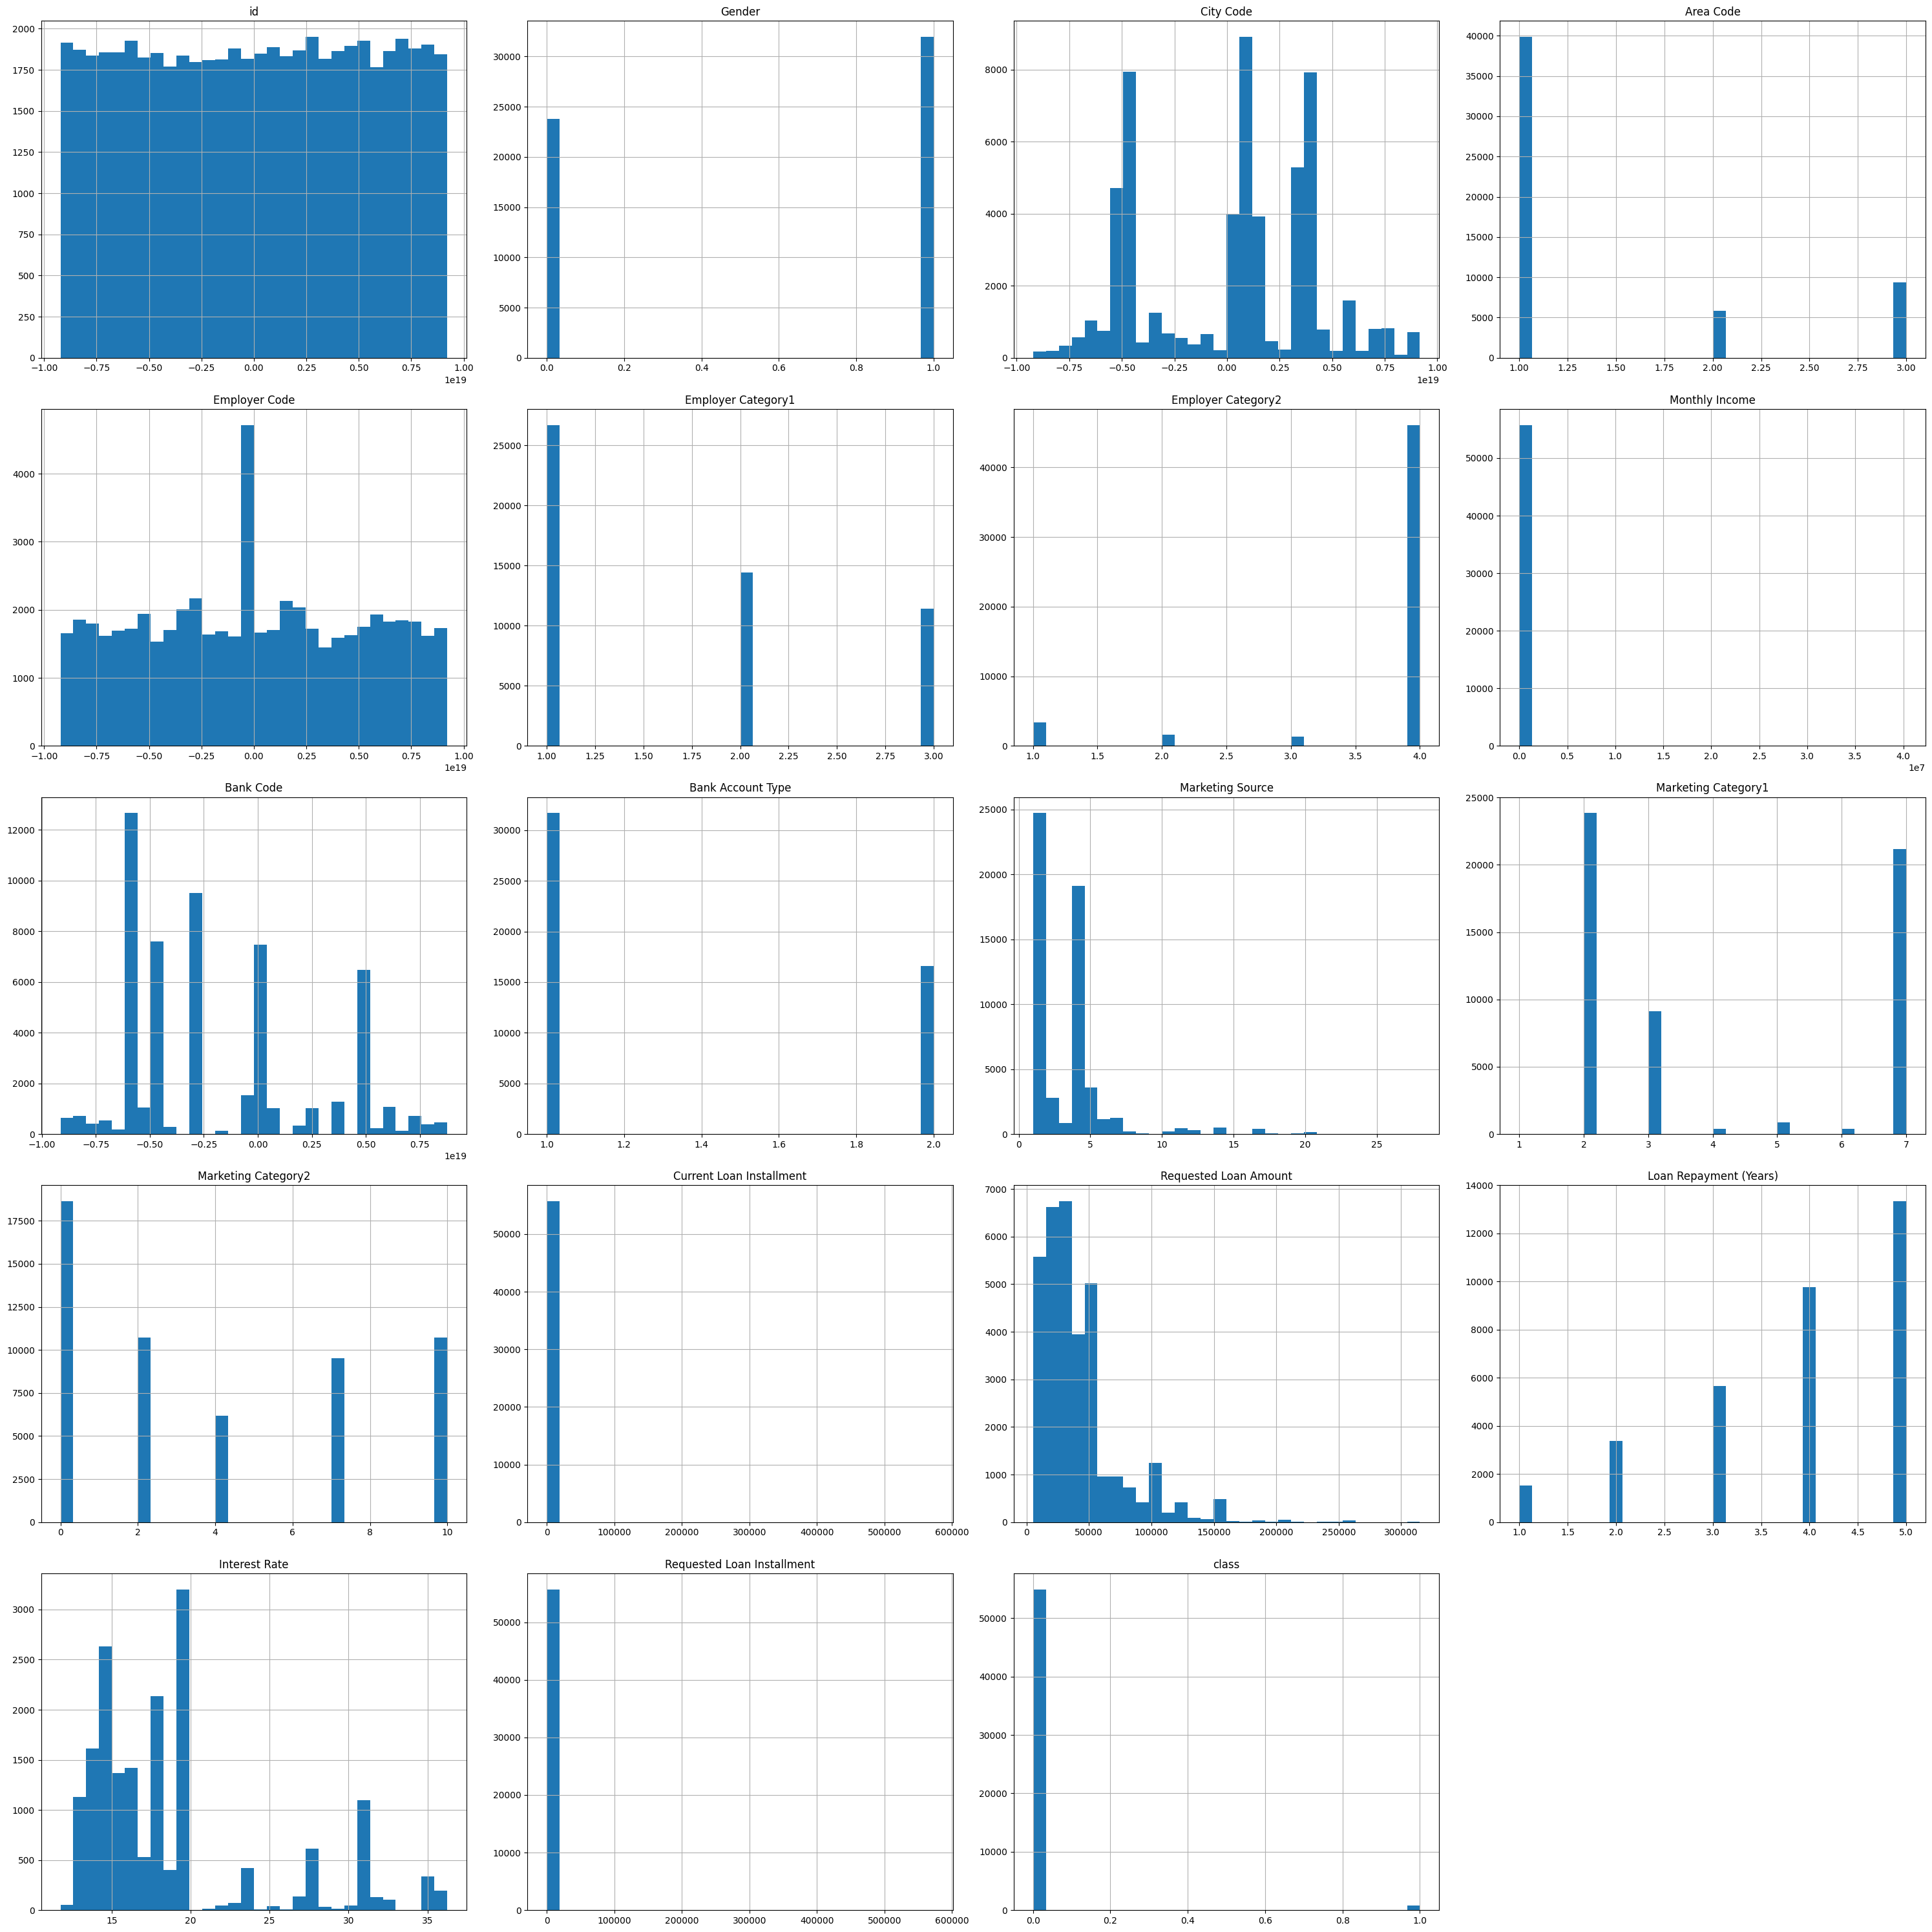

In [98]:
# Quick data distribution overview
df.hist(bins=30, figsize=(30, 30))
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

### Observations:
* id column can be removed
* There might be outliers for 'Monthly Income', 'Current Loan Installment', 'Requested Loan Amount', 'Requested Loan Installment'
* I can create new column 'Age' for example to calculate the age during the loan application (col 04 - col 03)

## 01 Remove id Column

In [99]:
df = df.drop(['id'], axis=1)

## (02) Gender Distribution (CATEGORICAL)

In [100]:
df['Gender'].value_counts()

Gender
1    31948
0    23812
Name: count, dtype: int64

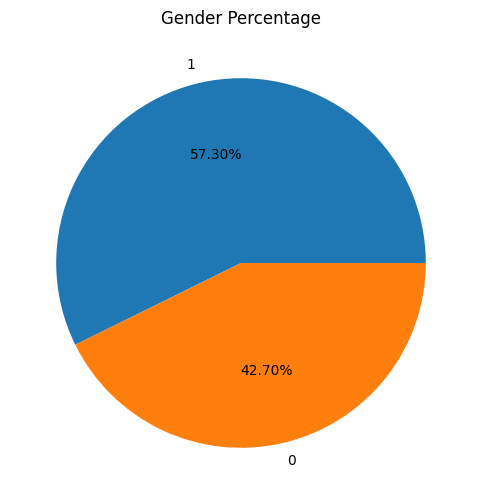

In [101]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(), labels=['1','0'], autopct='%1.2f%%')
plt.title('Gender Percentage')
plt.show()

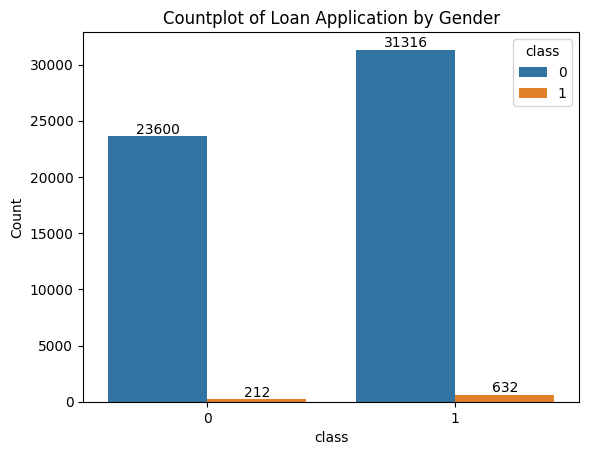

In [102]:
# barplot againts target colums (classification)
fig = sns.countplot(data=df, x='Gender', hue='class')

# set the x and y labels and title
fig.set_xlabel("class")
fig.set_ylabel("Count")
fig.set_title("Countplot of Loan Application by Gender")

for bars in fig.containers:
    fig.bar_label(bars)

In [103]:
## Count Percentage
gender_count_by_class = df.groupby(['Gender', 'class']).size().unstack(fill_value=0)

# Calculate the total count of customers for each Country
gender_total_count = gender_count_by_class.sum(axis=1)

# # Calculate the percentage of churn by Country
class_percentage_by_gender = (gender_count_by_class[1] / gender_total_count) * 100

# # Reset the index to use 'Gender' and 'Churn' as columns
class_percentage_by_gender = class_percentage_by_gender.reset_index()

# # Rename columns
class_percentage_by_gender.columns = ['Gender', 'Loan Percentage']
print(class_percentage_by_gender)

   Gender  Loan Percentage
0       0         0.890307
1       1         1.978215


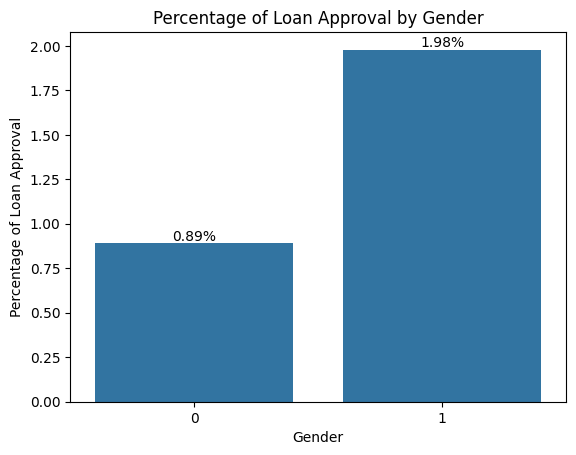

In [104]:
# Bar plot
sns.barplot(x='Gender', y='Loan Percentage', data=class_percentage_by_gender)

# Annotate count values for Gender distribution
for i, count in enumerate(class_percentage_by_gender['Loan Percentage']):
    plt.text(i, count, f"{count:.2f}%", ha='center', va='bottom')

plt.title('Percentage of Loan Approval by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Loan Approval')

plt.show()

#### Observations:

* Assuming that 1 is male and 0 is female(no details given), I can see that majority of the applicant is 1 (male).
* Approval loan by male only at 1.98% of all application and by female only 0.89% rate. This is very low rate

## (03) Date of Birth of the Applicant Distribution 

In [105]:
# Copy df for date analysis
df_analysis = df.copy()

In [106]:
# Convert object type of 03 and 04 to datetime datatype for both train dataset

def convert_to_datetime(df:pd.DataFrame, columns:list[str]) -> pd.DataFrame:
    for col in columns:
        df[col] = pd.to_datetime(df[col])

    return df

columns_to_covert_datetime = ["Date Of Birth", "Lead Creation Date"]

df_analysis = convert_to_datetime(df_analysis,columns_to_covert_datetime)

In [107]:
df_analysis['Date Of Birth'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 55760 entries, 0 to 55759
Series name: Date Of Birth
Non-Null Count  Dtype         
--------------  -----         
55752 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 435.8 KB


In [108]:
# Split the DataFrame based on loan approval
approve_df = df_analysis[df_analysis['class'] == 1]
not_approve_df = df_analysis[df['class'] == 0]

In [109]:
df_analysis['Date Of Birth'].isnull().sum()

8

There are 8 missing values on 03 (birth of date). Lets check of the class status for missing values of 03


In [110]:
df_analysis[df_analysis['Date Of Birth'].isnull()]

,Gender,Date Of Birth,Lead Creation Date,City Code,Area Code,Employer Code,Employer Category1,Employer Category2,Monthly Income,Bank Code,Bank Account Type,Marketing Source,Marketing Category1,Marketing Category2,Current Loan Installment,Requested Loan Amount,Loan Repayment (Years),Interest Rate,Requested Loan Installment,class
3501,1,NaT,2016-09-25,2134859983445416200,1.0,8322794614403,NaN,NaN,0.0,8322794614403,NaN,1,7,0,0.0,NaN,NaN,NaN,0.0,0
10561,1,NaT,2016-09-25,-4630370090178117459,1.0,8322794614403,NaN,NaN,0.0,8322794614403,NaN,1,7,0,0.0,NaN,NaN,NaN,0.0,0
11350,1,NaT,2016-09-25,630300624900511972,1.0,8322794614403,NaN,NaN,0.0,8322794614403,NaN,1,7,0,0.0,NaN,NaN,NaN,0.0,0
15024,1,NaT,2016-09-25,2134859983445416200,1.0,8322794614403,NaN,NaN,0.0,8322794614403,NaN,1,7,0,0.0,NaN,NaN,NaN,0.0,0
15315,1,NaT,2016-05-14,3466152762937442713,1.0,8322794614403,NaN,NaN,0.0,8322794614403,NaN,1,7,0,0.0,NaN,NaN,NaN,0.0,0
17912,1,NaT,2016-09-25,-4630370090178117459,1.0,8322794614403,NaN,NaN,0.0,8322794614403,NaN,1,7,0,0.0,NaN,NaN,NaN,0.0,0
23513,1,NaT,2016-09-14,4195062457429987311,1.0,8322794614403,NaN,NaN,0.0,8322794614403,NaN,1,7,0,0.0,NaN,NaN,NaN,0.0,0
53789,1,NaT,2016-09-25,-6244770642135776201,1.0,8322794614403,NaN,NaN,0.0,8322794614403,NaN,1,7,0,0.0,NaN,NaN,NaN,0.0,0


In [111]:
## 1. There are 8 missing values of 03 which is the Date of Birth of the applicant. I can remove this one since it is too minor and hard to generate accurate syntetic Date of Birth
df_analysis = df_analysis.dropna(subset=['Date Of Birth'])

In [112]:
df_analysis['Date Of Birth'].isnull().sum()

0

In [113]:
df_analysis['Date Of Birth'].describe()

count                            55752
mean     1993-03-26 00:52:16.633663360
min                1974-01-06 00:00:00
25%                1984-07-20 00:00:00
50%                1988-05-12 00:00:00
75%                1991-07-21 00:00:00
max                2074-01-05 00:00:00
Name: Date Of Birth, dtype: object

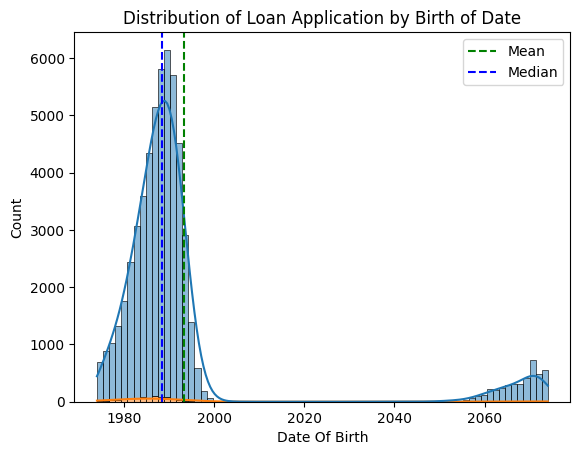

In [114]:
sns.histplot(x = 'Date Of Birth', data = df_analysis, bins=74, hue='class', multiple='stack', kde=True)
plt.title('Distribution of Loan Application by Birth of Date')

# derive the line of mean and median and mode
plt.axvline(df_analysis['Date Of Birth'].mean(), color='g', linestyle='--', label='Mean')
plt.axvline(df_analysis['Date Of Birth'].median(), color='b', linestyle='--', label='Median')
plt.legend()
plt.show()

### Observations:
* There are much illogical date for birth of date.
* Option for further action:
    - Check if all the illogical date has class value 0, which means, anyone give invalid birth of date automatically reject the loan approval.
    - Create a new column with "age" where, the value is 04-03 (the age when they start the loan application). Analyse age with negative values if all the loan been approved or not.
    - Can also check if age <18 exist since I don't think bank can approve application by underage.

## (04) Lead Creation Date Distribution

In [115]:
df_analysis['Lead Creation Date'].describe()

count                            55752
mean     2016-08-02 16:33:08.291002880
min                2016-01-12 00:00:00
25%                2016-07-19 00:00:00
50%                2016-08-22 00:00:00
75%                2016-09-23 00:00:00
max                2016-12-14 00:00:00
Name: Lead Creation Date, dtype: object

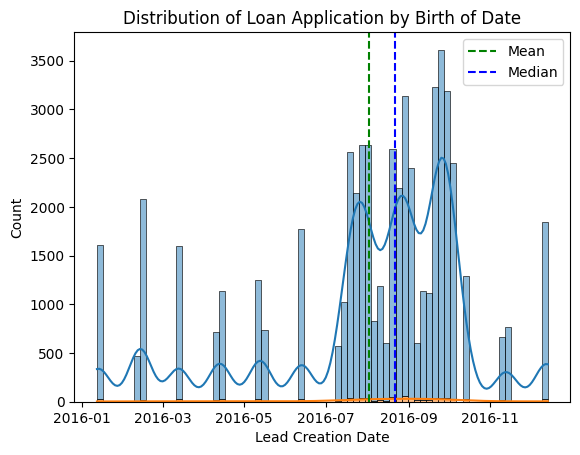

In [116]:
sns.histplot(x = 'Lead Creation Date', data = df_analysis, bins=74, hue='class', multiple='stack', kde=True)
plt.title('Distribution of Loan Application by Birth of Date')

# derive the line of mean and median and mode
plt.axvline(df_analysis['Lead Creation Date'].mean(), color='g', linestyle='--', label='Mean')
plt.axvline(df_analysis['Lead Creation Date'].median(), color='b', linestyle='--', label='Median')
plt.legend()
plt.show()

### Observations:
* The date for Lead Creation Date is more logic.
* The dataset has the lead creation date between 12-01-2016 until 14-12-2016
* Majority of the application start between July until October 2016

## Analyse DataTime Column 3 and 4 & Produce New Column 21 of Applicant Age

This would be the difference between 04 and 03. The age when they apply for loan.

In [117]:
df.columns

Index(['Gender', 'Date Of Birth', 'Lead Creation Date', 'City Code',
       'Area Code', 'Employer Code', 'Employer Category1',
       'Employer Category2', 'Monthly Income', 'Bank Code',
       'Bank Account Type', 'Marketing Source', 'Marketing Category1',
       'Marketing Category2', 'Current Loan Installment',
       'Requested Loan Amount', 'Loan Repayment (Years)', 'Interest Rate',
       'Requested Loan Installment', 'class'],
      dtype='object')

In [118]:
# Calculate the age based on Date of Birth and Lead Creation Date
df_analysis['Age'] = ((df_analysis['Lead Creation Date'] - df_analysis['Date Of Birth']).dt.days / 365.25).astype(int)

In [119]:
df_analysis.head()

,Gender,Date Of Birth,Lead Creation Date,City Code,Area Code,Employer Code,Employer Category1,Employer Category2,Monthly Income,Bank Code,...,Marketing Source,Marketing Category1,Marketing Category2,Current Loan Installment,Requested Loan Amount,Loan Repayment (Years),Interest Rate,Requested Loan Installment,class,Age
0,0,1992-08-19,2016-07-26,4195062457429987311,1.0,5451653042631526903,2.0,4.0,2415.0,3478590461776679480,...,5,3,4,0.00,40950.0,5.0,NaN,0.00,0,23
1,1,1975-03-17,2016-02-14,-6228735452334436716,3.0,8322794614403,NaN,NaN,2625.0,8322794614403,...,1,7,0,0.00,NaN,NaN,NaN,0.00,0,40
2,1,1983-04-07,2016-07-27,4195062457429987311,1.0,7958738730440449375,2.0,4.0,6772.5,-2629564825712250164,...,4,2,10,2063.04,21000.0,5.0,15.19,2063.04,0,33
3,0,1975-01-23,2016-08-23,630300624900511972,1.0,-5322077886952523742,1.0,3.0,7980.0,-5682066992016760665,...,4,2,10,1575.00,NaN,NaN,NaN,1575.00,0,41
4,0,1994-06-27,2016-07-21,4195062457429987311,1.0,-974246632625402816,2.0,4.0,945.0,4934588897315644940,...,4,3,0,0.00,NaN,NaN,NaN,0.00,0,22


In [120]:
df_analysis['Age'].describe()

count    55752.000000
mean        22.929850
std         21.395298
min        -57.000000
25%         25.000000
50%         28.000000
75%         32.000000
max         42.000000
Name: Age, dtype: float64

So now it have been discovered that there are illogical date for 03, lets dig deeper

In [121]:
df_analysis_negative_age = df_analysis[df_analysis['Age'] < 0]
df_analysis_negative_age

,Gender,Date Of Birth,Lead Creation Date,City Code,Area Code,Employer Code,Employer Category1,Employer Category2,Monthly Income,Bank Code,...,Marketing Source,Marketing Category1,Marketing Category2,Current Loan Installment,Requested Loan Amount,Loan Repayment (Years),Interest Rate,Requested Loan Installment,class,Age
6,1,2063-03-17,2016-08-28,-3637721174456340119,2.0,3338580749167107692,1.0,4.0,5145.0,8322794614403,...,4,2,7,318.99,52500.0,5.0,14.553,318.99,0,-46
12,0,2069-05-19,2016-08-24,-4630370090178117459,1.0,5117470031149109091,3.0,4.0,2835.0,3478590461776679480,...,4,2,7,0.00,10500.0,2.0,26.460,0.00,0,-52
34,0,2059-02-14,2016-09-19,8322794614403,NaN,2862921425267266456,2.0,4.0,2625.0,8322794614403,...,1,7,0,0.00,NaN,NaN,NaN,0.00,0,-42
44,1,2061-07-26,2016-11-12,4195062457429987311,1.0,-2470449707977236061,1.0,4.0,2730.0,-4438975989796485538,...,11,3,4,0.00,40950.0,5.0,NaN,0.00,0,-44
47,1,2071-03-08,2016-08-22,-4630370090178117459,1.0,7795452914832261813,1.0,4.0,4725.0,-5682066992016760665,...,4,3,7,0.00,72450.0,4.0,14.553,0.00,1,-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55627,1,2072-04-25,2016-09-18,836004393031144485,2.0,-8168384975252699277,1.0,4.0,4200.0,4934588897315644940,...,1,7,7,0.00,21000.0,4.0,NaN,0.00,0,-55
55640,1,2073-02-13,2016-10-04,-4630370090178117459,1.0,8400963541230764157,2.0,4.0,2488.5,8111337272549962847,...,1,7,2,840.00,22050.0,4.0,NaN,840.00,0,-56
55644,0,2064-10-10,2016-07-22,-669216824074367049,3.0,3949285557511268379,1.0,4.0,3675.0,-4438975989796485538,...,4,2,7,0.00,52500.0,4.0,15.925,0.00,0,-48
55664,0,2058-01-05,2016-02-14,204787955932075107,1.0,7196373247019303966,2.0,4.0,9765.0,5836354291952945472,...,1,7,0,5355.00,NaN,NaN,NaN,5355.00,0,-41


So now, I have about 4162 rows which has negative date of birth.

In [122]:
df_analysis_negative_age['class'].value_counts()

class
0    4089
1      73
Name: count, dtype: int64

In [123]:
df_analysis_negative_age[df_analysis_negative_age['class'] == 1]

,Gender,Date Of Birth,Lead Creation Date,City Code,Area Code,Employer Code,Employer Category1,Employer Category2,Monthly Income,Bank Code,...,Marketing Source,Marketing Category1,Marketing Category2,Current Loan Installment,Requested Loan Amount,Loan Repayment (Years),Interest Rate,Requested Loan Installment,class,Age
47,1,2071-03-08,2016-08-22,-4630370090178117459,1.0,7795452914832261813,1.0,4.0,4725.000,-5682066992016760665,...,4,3,7,0.00,72450.0,4.0,14.5530,0.00,1,-54
1018,1,2069-08-03,2016-02-13,-4630370090178117459,1.0,-8614241991090292179,2.0,4.0,5250.000,4934588897315644940,...,1,2,10,0.00,52500.0,5.0,NaN,0.00,1,-53
1099,1,2070-04-14,2016-08-19,5690717071986124099,3.0,-6150861729650212776,1.0,4.0,4515.000,-4438975989796485538,...,5,2,7,1155.00,75600.0,5.0,NaN,1155.00,1,-53
2216,1,2068-07-20,2016-07-30,1289655673896248250,2.0,-1298907407717853063,1.0,4.0,4501.875,-2629564825712250164,...,4,2,10,1575.00,21000.0,5.0,14.5530,1575.00,1,-51
3355,1,2063-11-11,2016-12-13,630300624900511972,1.0,-8402608796451785376,3.0,4.0,7140.000,4934588897315644940,...,1,2,10,0.00,84000.0,5.0,NaN,0.00,1,-46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52399,0,2065-04-11,2016-08-20,523552228164255532,1.0,-7138479218376970665,2.0,4.0,12018.300,-2629564825712250164,...,4,2,0,6825.00,NaN,NaN,NaN,6825.00,1,-48
52743,1,2067-04-23,2016-09-28,-5413728021433296369,1.0,-8991695159191988743,1.0,4.0,12600.000,-2629564825712250164,...,1,7,10,4200.00,52500.0,3.0,NaN,4200.00,1,-50
54351,1,2073-12-14,2016-02-14,630300624900511972,1.0,-7046506184385923735,1.0,4.0,4095.000,-3967801786845563296,...,1,7,7,0.00,15750.0,2.0,13.7102,0.00,1,-57
54902,1,2062-06-13,2016-02-14,1322416564569257070,1.0,4360980137454341170,3.0,4.0,7875.000,-5682066992016760665,...,1,7,10,2768.43,96600.0,4.0,13.4750,2768.43,1,-46


* Interestingly, although the age is negative, which mean invalid date of birth, there are also approved loan about 73. How come the application been approved?
* So now what options do i have?
- [ ] Change the birth date to mean value? But we have so many illogical date
- [ ] Change the birth date to at least 18 years before application date (col 04) or randomly between certain age range? - more logic
- [ ] Remove the whole Column 03?
- [ ] Use KNN imputation to create missing dates?

Decided Approach:
- Since there are only minimal missing value on 03 on both train dataset, I can just replace the value with mean value. But IF there are lots of missing data, i would go with predictive modelling, where i will build a ML model to predict the missing value.
- Create another column to mark as inconsistent date or invalid date with value 0, 1. This way, I will not remove any dataset.

### Check for Underage Application (Age <= 18)

In [124]:
df_underage = df_analysis[(df_analysis['Age'] >= 0) & (df_analysis['Age'] <= 18)]
df_underage

,Gender,Date Of Birth,Lead Creation Date,City Code,Area Code,Employer Code,Employer Category1,Employer Category2,Monthly Income,Bank Code,...,Marketing Source,Marketing Category1,Marketing Category2,Current Loan Installment,Requested Loan Amount,Loan Repayment (Years),Interest Rate,Requested Loan Installment,class,Age
22,0,1998-03-07,2016-07-13,630300624900511972,1.0,3488403524855702283,1.0,4.0,630.0,2429150979796651298,...,4,3,0,0.0,NaN,NaN,NaN,0.0,0,18
1082,0,1997-12-16,2016-11-13,1322416564569257070,1.0,2410244721407462433,2.0,4.0,892.5,-5682066992016760665,...,1,3,0,0.0,NaN,NaN,NaN,0.0,0,18
1223,1,1998-09-01,2016-02-14,836004393031144485,2.0,8322794614403,NaN,NaN,2625.0,8322794614403,...,1,7,0,0.0,NaN,NaN,NaN,0.0,0,17
1390,0,1998-02-12,2016-07-27,-1340507116294599567,3.0,7424468215526668723,1.0,4.0,12600.0,8322794614403,...,4,2,0,735.0,NaN,NaN,NaN,735.0,0,18
1415,0,1997-06-08,2016-04-14,-5413728021433296369,1.0,4028843058572664611,1.0,4.0,2100.0,8322794614403,...,1,7,0,0.0,NaN,NaN,NaN,0.0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55233,0,1997-08-13,2016-07-25,-4630370090178117459,1.0,2422465321738944293,1.0,4.0,630.0,8539803618353409641,...,4,3,0,0.0,NaN,NaN,NaN,0.0,0,18
55340,0,1997-11-07,2016-07-25,630300624900511972,1.0,8774080178340421832,1.0,4.0,1050.0,-5682066992016760665,...,6,2,0,735.0,NaN,NaN,NaN,735.0,0,18
55465,0,1997-10-02,2016-07-19,-5413728021433296369,1.0,6030699744173991088,1.0,4.0,1575.0,4728405270981735958,...,4,2,0,0.0,NaN,NaN,NaN,0.0,0,18
55696,0,1998-02-21,2016-07-22,630300624900511972,1.0,3340690539774239190,1.0,4.0,1050.0,-5682066992016760665,...,4,2,0,315.0,NaN,NaN,NaN,315.0,0,18


In [125]:
df_underage['class'].value_counts()

class
0    152
Name: count, dtype: int64

* So now, I have about 152 rows which has applicants age below 18 years old.
* All application by underage has been rejected.

## 05 City Code Distribution (CATEGORICAL)

In [126]:
df_analysis['City Code'].describe()

count    5.575200e+04
mean     9.647216e+16
std      4.098948e+18
min     -9.223032e+18
25%     -4.630370e+18
50%      6.303006e+17
75%      3.466153e+18
max      9.171856e+18
Name: City Code, dtype: float64

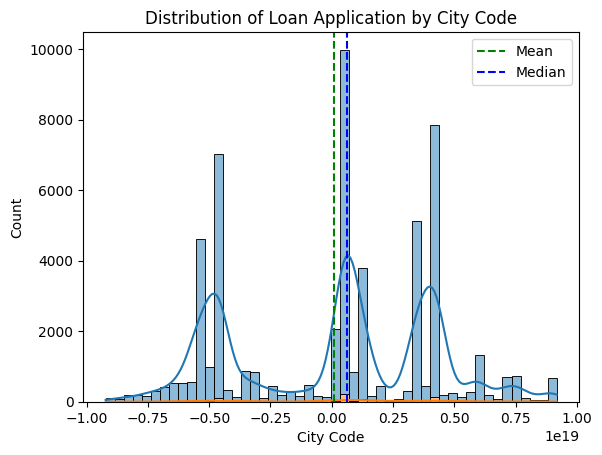

In [127]:
sns.histplot(x = 'City Code', data = df_analysis, bins=50, hue='class', multiple='stack', kde=True)
plt.title('Distribution of Loan Application by City Code')

# derive the line of mean and median and mode
plt.axvline(df_analysis['City Code'].mean(), color='g', linestyle='--', label='Mean')
plt.axvline(df_analysis['City Code'].median(), color='b', linestyle='--', label='Median')
plt.legend()
plt.show()

In [128]:
top5_city_code = df_analysis['City Code'].value_counts()
top5_city_code.head(5)

City Code
 630300624900511972     8036
 4195062457429987311    6942
-4630370090178117459    6926
 3466152762937442713    4653
-5413728021433296369    4443
Name: count, dtype: int64

### Observations:
* High loan application at certain city code.
* City code might not be the main reason for loan approval

## 06 Area Code Distribution (CATEGORICAL)

In [129]:
df_analysis['Area Code'].value_counts()

Area Code
1.0    39843
3.0     9407
2.0     5844
Name: count, dtype: int64

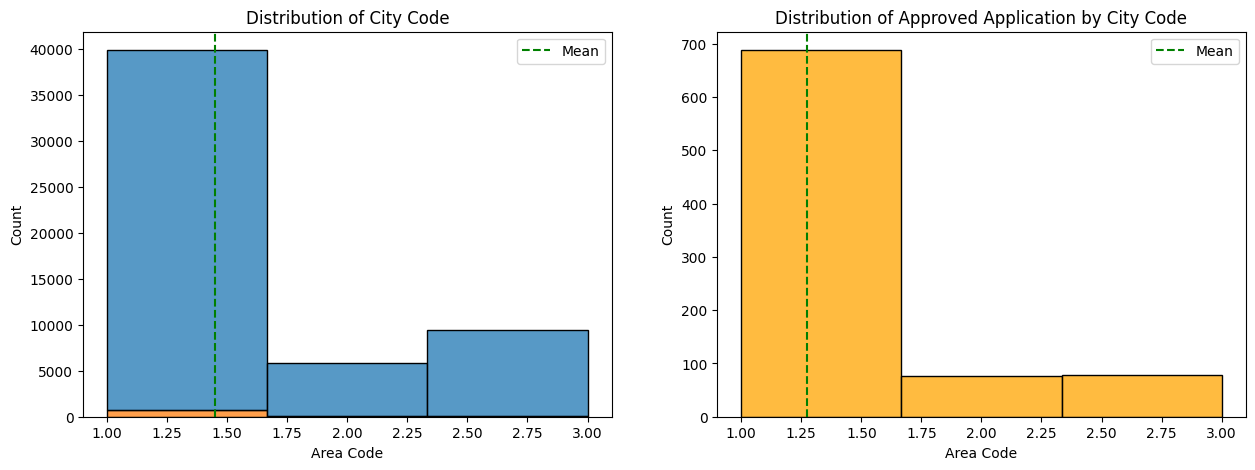

In [130]:
# histogram for age distribution
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Plot with Bin to have a better visualization of the data. Without bin, there might be misunderstanding of the data.
sns.histplot(x = 'Area Code', data=df_analysis, bins=3, hue='class', multiple='stack', kde=False, ax=ax[0])
ax[0].set_title('Distribution of City Code')
# derive the line of mean
ax[0].axvline(df_analysis['Area Code'].mean(), color='g', linestyle='--', label='Mean')
ax[0].legend()

sns.histplot(x = 'Area Code', data = approve_df, bins=3, multiple='stack', kde=False, ax=ax[1], color='orange')
ax[1].set_title('Distribution of Approved Application by City Code')
ax[1].axvline(approve_df['Area Code'].mean(), color='g', linestyle='--', label='Mean')
ax[1].legend()
plt.show()

In [131]:
approve_df['Area Code'].value_counts()

Area Code
1.0    688
3.0     78
2.0     76
Name: count, dtype: int64

In [132]:
## Count Percentage
areacode_count_by_loan = df_analysis.groupby(['Area Code', 'class']).size().unstack(fill_value=0)

# Calculate the total count of customers
areacode_total_count = areacode_count_by_loan.sum(axis=1)

# # Calculate the percentage of loan by emp2
loan_percentage_by_areacode = (areacode_count_by_loan[1] / areacode_total_count) * 100

# # Reset the index 
loan_percentage_by_areacode = loan_percentage_by_areacode.reset_index()

# # Rename columns
loan_percentage_by_areacode.columns = ['Area Code', 'Loan Approval Percentage']
print(loan_percentage_by_areacode)

   Area Code  Loan Approval Percentage
0        1.0                  1.726778
1        2.0                  1.300479
2        3.0                  0.829170


### Observations:
* Majority loan applicant and approve on Area Code 1. 
* However, the approval rate is similar for all area code.

## (07) Employer Code Date Distribution (CATEGORICAL)

In [133]:
df_analysis['Employer Code'].describe()

count    5.575200e+04
mean     5.292122e+15
std      5.164604e+18
min     -9.220672e+18
25%     -4.252914e+18
50%      8.322795e+12
75%      4.382629e+18
max      9.223290e+18
Name: Employer Code, dtype: float64

In [134]:
df_analysis['Employer Code'].value_counts()

Employer Code
 8322794614403          3185
 2383733661713253408     364
 5967184388409558521     256
-3396162759781770804     208
-3029148022183485597     192
                        ... 
-169606880490872068        1
-4390064524841736443       1
-7197236668566010816       1
 3916240509609211819       1
-856474502062988360        1
Name: count, Length: 30756, dtype: int64

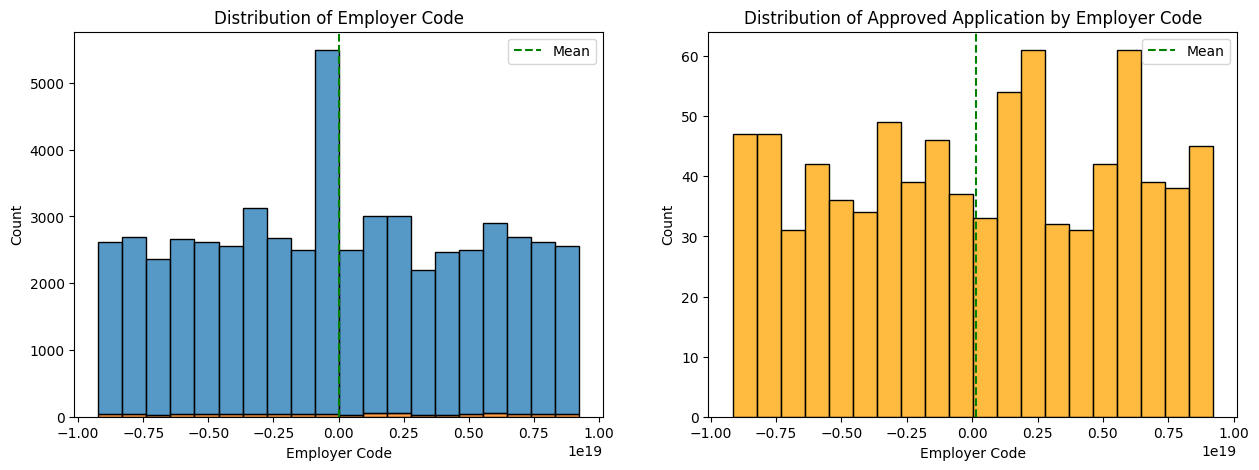

In [135]:
# histogram for age distribution
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Plot with Bin to have a better visualization of the data. Without bin, there might be misunderstanding of the data.
sns.histplot(x = 'Employer Code', data=df_analysis, bins=20,hue='class', multiple='stack', kde=False, ax=ax[0])
ax[0].set_title('Distribution of Employer Code')
# derive the line of mean
ax[0].axvline(df_analysis['Employer Code'].mean(), color='g', linestyle='--', label='Mean')
ax[0].legend()

sns.histplot(x = 'Employer Code', data = approve_df, bins=20, multiple='stack', kde=False, ax=ax[1], color='orange')
ax[1].set_title('Distribution of Approved Application by Employer Code')
ax[1].axvline(approve_df['Employer Code'].mean(), color='g', linestyle='--', label='Mean')
ax[1].legend()
plt.show()

In [136]:
approve_df['Employer Code'].describe()

count    8.440000e+02
mean     1.380428e+17
std      5.334328e+18
min     -9.168730e+18
25%     -4.303601e+18
50%      4.316036e+17
75%      4.888359e+18
max      9.205570e+18
Name: Employer Code, dtype: float64

### Observations:
* Employer code distributed randomly.
* I don't think area code play a big role in loan approval

## (08) Employer Category 1 Date Distribution (CATEGORICAL)

In [137]:
df_analysis['Employer Category1'].value_counts()

Employer Category1
1.0    26693
2.0    14449
3.0    11425
Name: count, dtype: int64

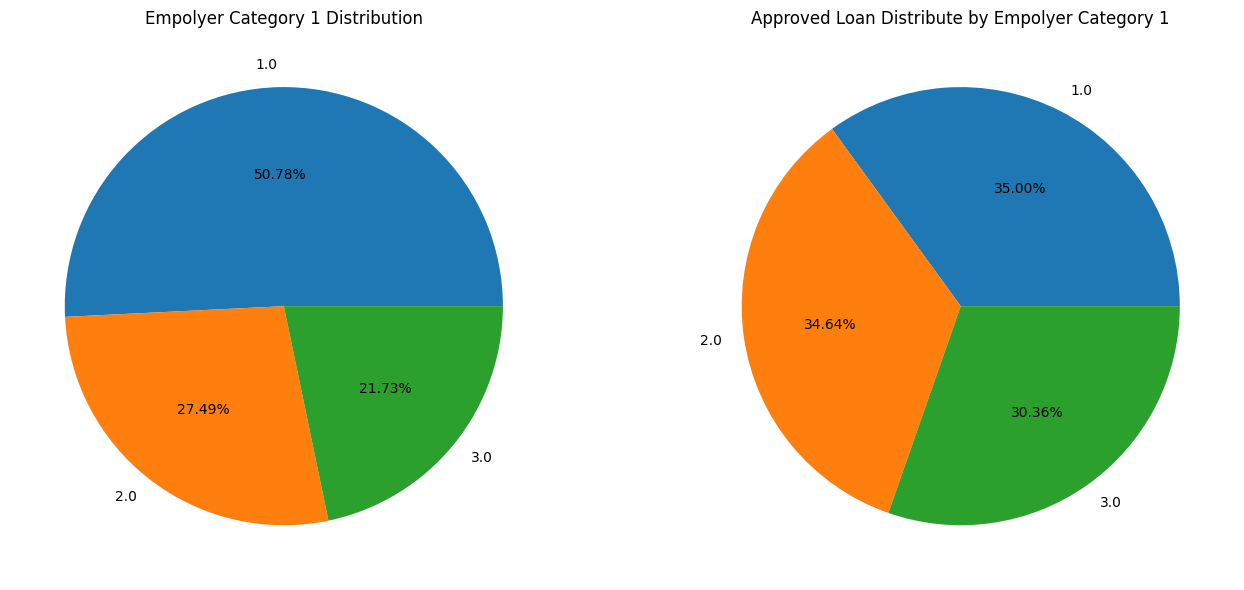

In [138]:
# Create a figure with two subplots, side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first pie chart
axes[0].pie(df_analysis['Employer Category1'].value_counts(), labels=['1.0','2.0','3.0'], autopct='%1.2f%%')
axes[0].set_title('Empolyer Category 1 Distribution')

# Plot the second pie chart
axes[1].pie(approve_df['Employer Category1'].value_counts(), labels=['1.0','2.0','3.0'], autopct='%1.2f%%')
axes[1].set_title('Approved Loan Distribute by Empolyer Category 1')

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()

In [139]:
## Count Percentage
emp1_count_by_loan = df_analysis.groupby(['Employer Category1', 'class']).size().unstack(fill_value=0)

# Calculate the total count of customers
empt2_total_count = emp1_count_by_loan.sum(axis=1)

# # Calculate the percentage of loan by emp2
loan_percentage_by_emp1 = (emp1_count_by_loan[1] / empt2_total_count) * 100

# # Reset the index 
loan_percentage_by_emp1 = loan_percentage_by_emp1.reset_index()

# # Rename columns
loan_percentage_by_emp1.columns = ['Employer Category1', 'Loan Approval Percentage']
print(loan_percentage_by_emp1)

   Employer Category1  Loan Approval Percentage
0                 1.0                  1.101412
1                 2.0                  2.013980
2                 3.0                  2.231947


### Observations:
* Majority (50.78%) loan applicants has employer 1 category 1.0.
* However, approved loan distribute almost equally for all type
* The loan approval percentage is about 1-2% for all type
* Employer category 1 might not be the main factor for loan approval

## (09) Employer Category 2 Date Distribution (CATEGORICAL)

In [140]:
df_analysis['Employer Category2'].value_counts()

Employer Category2
4.0    46085
1.0     3375
2.0     1577
3.0     1299
Name: count, dtype: int64

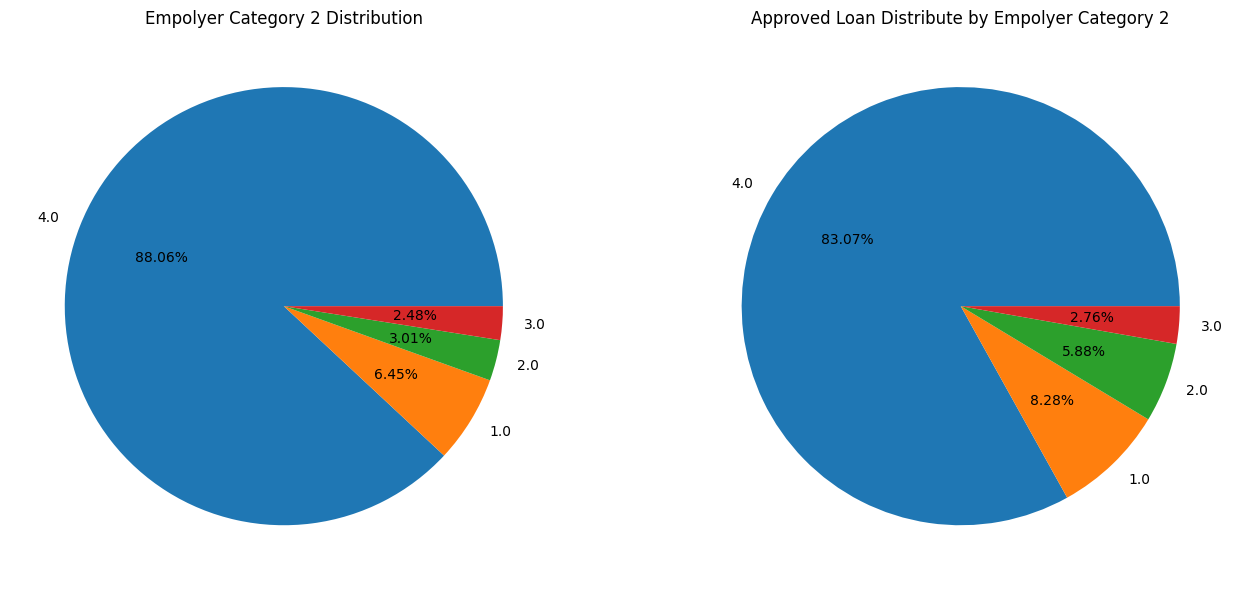

In [141]:
# Create a figure with two subplots, side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first pie chart
axes[0].pie(df_analysis['Employer Category2'].value_counts(), labels=['4.0', '1.0','2.0','3.0'], autopct='%1.2f%%')
axes[0].set_title('Empolyer Category 2 Distribution')

# Plot the second pie chart
axes[1].pie(approve_df['Employer Category2'].value_counts(), labels=['4.0', '1.0','2.0','3.0'], autopct='%1.2f%%')
axes[1].set_title('Approved Loan Distribute by Empolyer Category 2')

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()

In [142]:
## Count Percentage
emp2_count_by_loan = df_analysis.groupby(['Employer Category2', 'class']).size().unstack(fill_value=0)

# Calculate the total count of customers
empt2_total_count = emp2_count_by_loan.sum(axis=1)

# # Calculate the percentage of loan by emp2
loan_percentage_by_emp2 = (emp2_count_by_loan[1] / empt2_total_count) * 100

# # Reset the index 
loan_percentage_by_emp2 = loan_percentage_by_emp2.reset_index()

# # Rename columns
loan_percentage_by_emp2.columns = ['Employer Category2', 'Loan Approval Percentage']
print(loan_percentage_by_emp2)

   Employer Category2  Loan Approval Percentage
0                 1.0                  2.044444
1                 2.0                  3.107166
2                 3.0                  1.770593
3                 4.0                  1.501573


### Observations:
* Majority (88.06%) loan applicants has employer 2 category 4.0.
* Approved Loan is at highest for Employer 2 category 4.0 at 83% rate, maybe this is due to the high application rate with employer 2 category 4.0 type.
* The loan approval percentage is about 1.5-3% for all type
* Employer category 2 might not be the main factor for loan approval.

## (10) Monthly Income Data Distribution (NUMERICAL)

In [143]:
df.columns

Index(['Gender', 'Date Of Birth', 'Lead Creation Date', 'City Code',
       'Area Code', 'Employer Code', 'Employer Category1',
       'Employer Category2', 'Monthly Income', 'Bank Code',
       'Bank Account Type', 'Marketing Source', 'Marketing Category1',
       'Marketing Category2', 'Current Loan Installment',
       'Requested Loan Amount', 'Loan Repayment (Years)', 'Interest Rate',
       'Requested Loan Installment', 'class'],
      dtype='object')

In [144]:
df_analysis['Monthly Income'].describe()

count    5.575200e+04
mean     6.212875e+03
std      2.034680e+05
min      0.000000e+00
25%      1.732500e+03
50%      2.625000e+03
75%      4.200000e+03
max      4.030303e+07
Name: Monthly Income, dtype: float64

#### Observations:

* Count: Indicates the number of data points. In this case, there are 55,752 data points.
* Mean (Average): Represents the central tendency of the data. The mean monthly salary is $6,212.88.
* Standard Deviation (std): Measures the spread or dispersion of the data. A high standard deviation of $203,468 suggests a wide range of values.
* Minimum (Min): The smallest value in the dataset is $0. This could indicate cases where the salary is missing or recorded as zero.
* 25th Percentile (Q1): The value below which 25% of the data falls. The 25th percentile monthly salary is $1,732.50.
* Median (50th Percentile): The middle value of the dataset. The median monthly salary is $2,625. This is less sensitive to extreme values compared to the mean.
* 75th Percentile (Q3): The value below which 75% of the data falls. The 75th percentile monthly salary is $4,200.
* Maximum (Max): The largest value in the dataset is $40,303,030, which is significantly higher than other values. This could be an outlier.

#### Based on this summary:

Skewness: The mean is greater than the median, indicating a right-skewed distribution. This suggests that there might be some high salaries pulling the mean upwards.

Outliers: The maximum value is notably higher than other values, suggesting the presence of outliers. I might need to investigate these extreme values to determine if they are valid or if they should be treated as outliers.

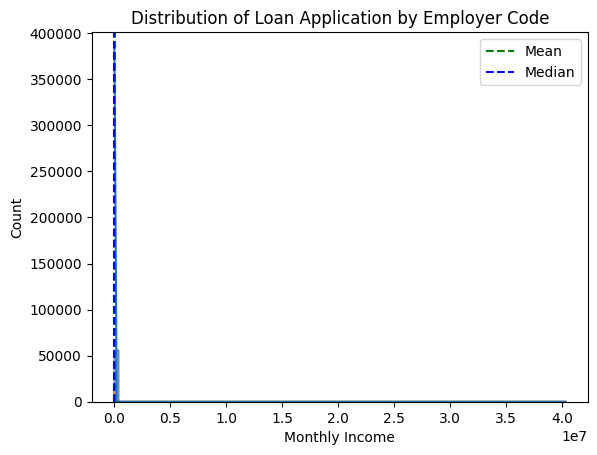

In [145]:
sns.histplot(x = 'Monthly Income', data = df_analysis, bins=100, hue='class', multiple='stack', kde=True)
plt.title('Distribution of Loan Application by Employer Code')

# derive the line of mean and median and mode
plt.axvline(df_analysis['Monthly Income'].mean(), color='g', linestyle='--', label='Mean')
plt.axvline(df_analysis['Monthly Income'].median(), color='b', linestyle='--', label='Median')
plt.legend()
plt.show()

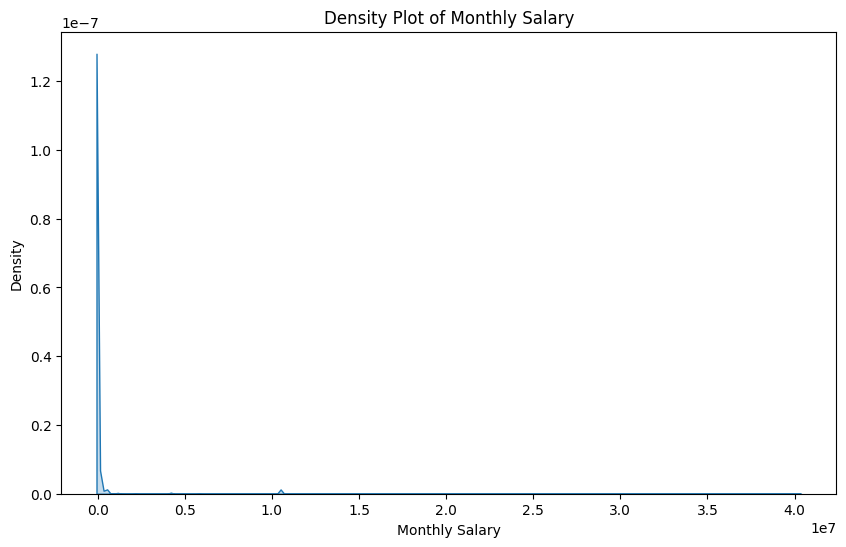

In [146]:
# Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df_analysis['Monthly Income'], fill=True)
plt.title('Density Plot of Monthly Salary')
plt.xlabel('Monthly Salary')
plt.ylabel('Density')
plt.show()

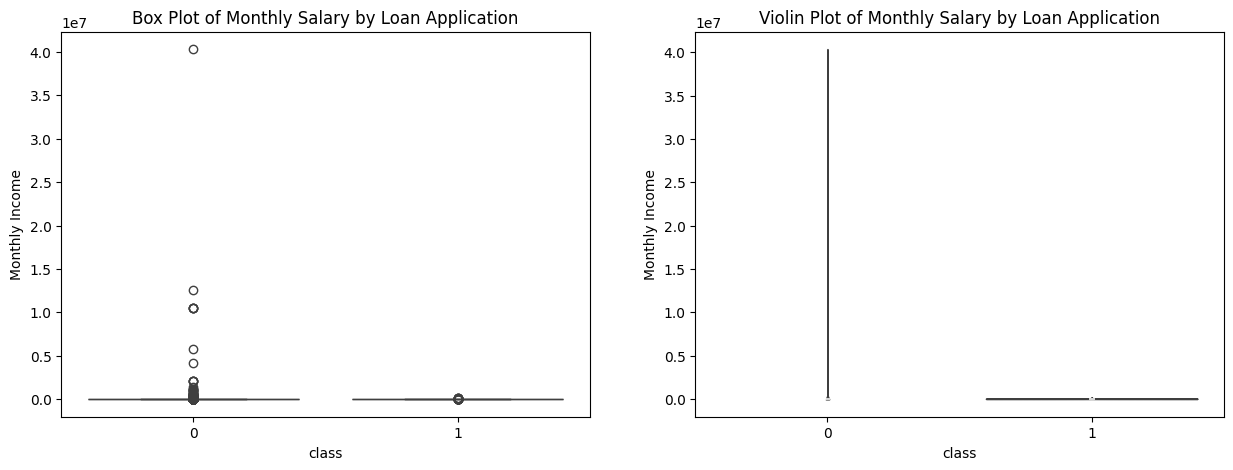

In [147]:
# Check for outliers
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x ='class' , y = 'Monthly Income', data=df_analysis ,ax=ax[0])
ax[0].set_title('Box Plot of Monthly Salary by Loan Application')

sns.violinplot(x ='class' , y = 'Monthly Income', data=df_analysis ,ax=ax[1])
ax[1].set_title('Violin Plot of Monthly Salary by Loan Application')
plt.show()

In [148]:
# set limit here
range = 200000

# Try to see how any rows with amount above limit
salary_above_range = df_analysis[df_analysis['Monthly Income'] > range]

# Count the number of rows where the 'Amount' column is above 100
count_above_range = salary_above_range.shape[0]

print(f"Number of rows with salary above {range}:, {count_above_range}")

Number of rows with salary above 200000:, 42


In [149]:
salary_above_range['class'].value_counts()

class
0    42
Name: count, dtype: int64

In [150]:
# count of monthly salary == 0
len(df_analysis[df_analysis['Monthly Income'] == 0])

191

In [151]:
len(df_analysis[df_analysis['Monthly Income'] < 0])

0

### Observations:
* I can see here, there are too wide range of monthly income. 
* When i try to see salary above 200,000 all of the loan appplication has been rejected.
* Huge outliers value. I might need to handle this outliers. Maybe i can implement log transformation or binning. And then check again on the boxplot. or just remove outlier using IQR ro Z score method
* Maybe i will just remove illogical monthly salary e.g. remove above 500k


## Log Transformation

NOTE: Using log1p might be best for highly skwed data.

In [152]:
# since i can not do log transformation on 0 values, I will replace monthly salary <= 1 to = 2. since <=1 will return log as negative value.
# df_analysis.loc[df_analysis['Monthly Income'] <= 1, 'Monthly Income'] = 2

In [153]:
# len(df_analysis[df_analysis['Monthly Income'] <= 1])

In [154]:
import numpy as np

# Add a small constant to all values to ensure they are positive
df_analysis['Monthly_Income_log'] = np.log1p(df_analysis['Monthly Income'] + 1e-10)
# df_analysis['10_log'] = np.log(df_analysis['10'])

# Remove the original column
df_analysis.drop(columns=['Monthly Income'], inplace=True)
df_analysis.head()

,Gender,Date Of Birth,Lead Creation Date,City Code,Area Code,Employer Code,Employer Category1,Employer Category2,Bank Code,Bank Account Type,...,Marketing Category1,Marketing Category2,Current Loan Installment,Requested Loan Amount,Loan Repayment (Years),Interest Rate,Requested Loan Installment,class,Age,Monthly_Income_log
0,0,1992-08-19,2016-07-26,4195062457429987311,1.0,5451653042631526903,2.0,4.0,3478590461776679480,2.0,...,3,4,0.00,40950.0,5.0,NaN,0.00,0,23,7.789869
1,1,1975-03-17,2016-02-14,-6228735452334436716,3.0,8322794614403,NaN,NaN,8322794614403,NaN,...,7,0,0.00,NaN,NaN,NaN,0.00,0,40,7.873217
2,1,1983-04-07,2016-07-27,4195062457429987311,1.0,7958738730440449375,2.0,4.0,-2629564825712250164,1.0,...,2,10,2063.04,21000.0,5.0,15.19,2063.04,0,33,8.820773
3,0,1975-01-23,2016-08-23,630300624900511972,1.0,-5322077886952523742,1.0,3.0,-5682066992016760665,1.0,...,2,10,1575.00,NaN,NaN,NaN,1575.00,0,41,8.984819
4,0,1994-06-27,2016-07-21,4195062457429987311,1.0,-974246632625402816,2.0,4.0,4934588897315644940,1.0,...,3,0,0.00,NaN,NaN,NaN,0.00,0,22,6.852243


In [155]:
len(df_analysis[df_analysis['Monthly_Income_log'] <= 0])

0

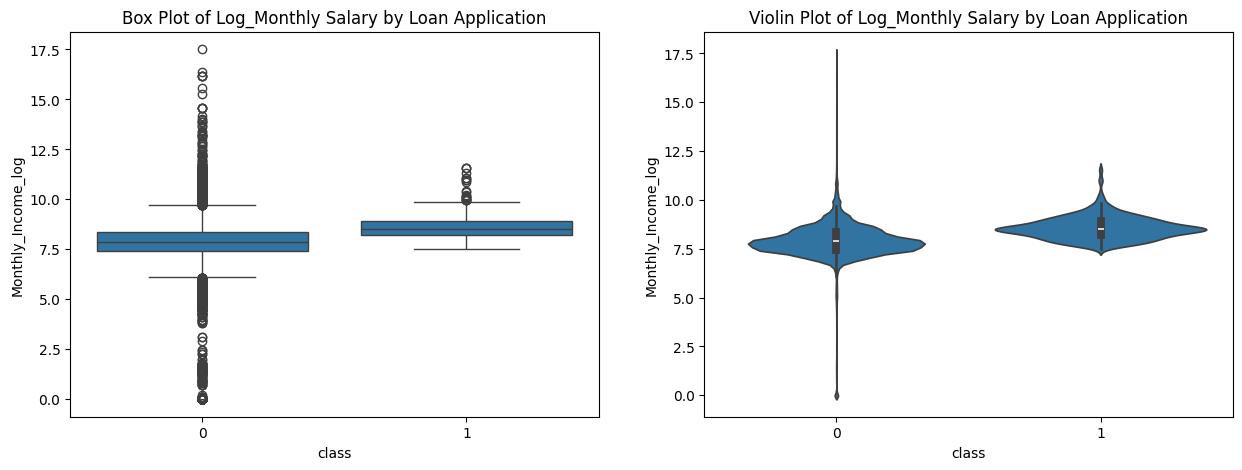

In [156]:
# Check for outliers
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x ='class' , y = 'Monthly_Income_log', data=df_analysis ,ax=ax[0])
ax[0].set_title('Box Plot of Log_Monthly Salary by Loan Application')

sns.violinplot(x ='class' , y = 'Monthly_Income_log', data=df_analysis ,ax=ax[1])
ax[1].set_title('Violin Plot of Log_Monthly Salary by Loan Application')
plt.show()

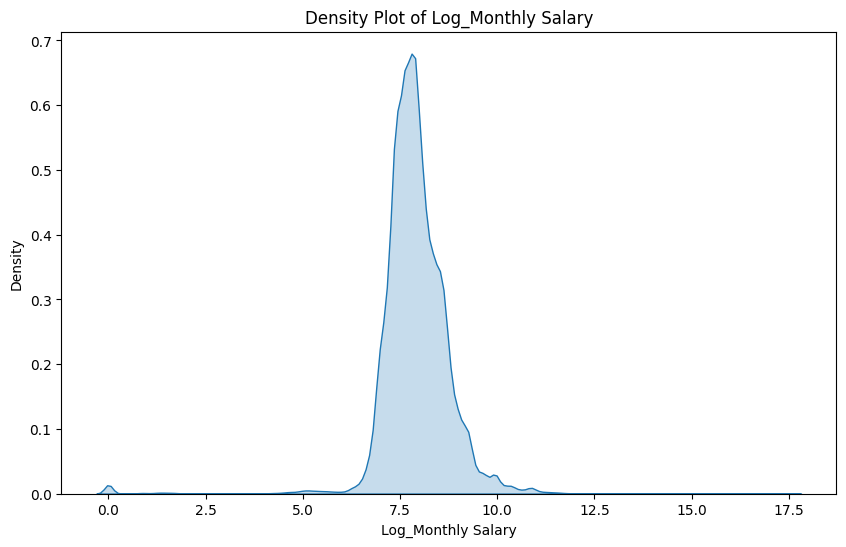

In [157]:
# Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df_analysis['Monthly_Income_log'], fill=True)
plt.title('Density Plot of Log_Monthly Salary')
plt.xlabel('Log_Monthly Salary')
plt.ylabel('Density')
plt.show()

In [158]:
df_analysis['Monthly_Income_log'].describe()

count    5.575200e+04
mean     7.897580e+00
std      9.081915e-01
min      1.000000e-10
25%      7.457898e+00
50%      7.873217e+00
75%      8.343078e+00
max      1.751194e+01
Name: Monthly_Income_log, dtype: float64

### Observations.
* The data distribution after log1p transformation is a lot better.

## (11) Bank Code Data Distribution (CATEGORICAL)

In [160]:
df_analysis['Bank Code'].nunique()

58

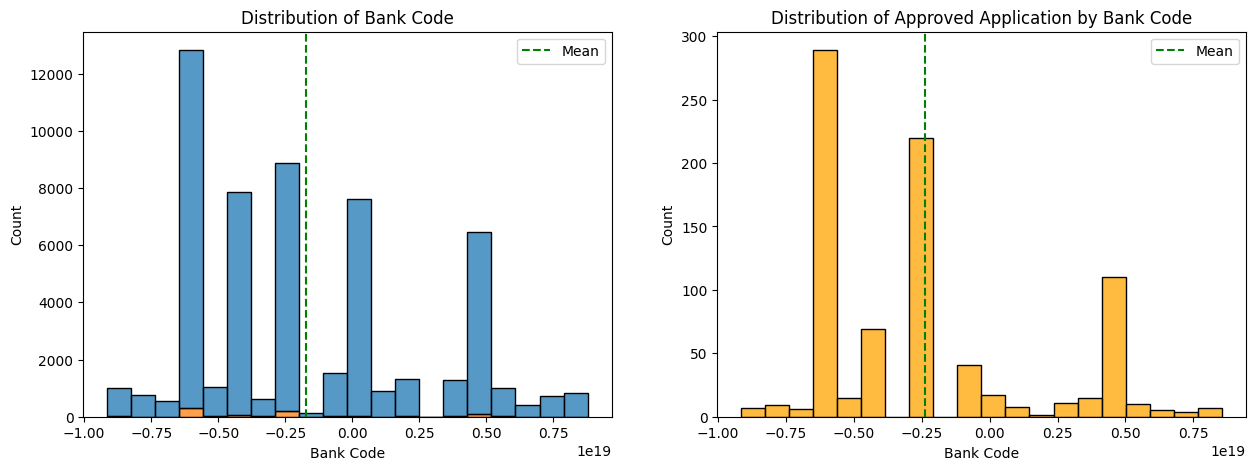

In [161]:
# histogram for age distribution
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Plot with Bin to have a better visualization of the data. Without bin, there might be misunderstanding of the data.
sns.histplot(x = 'Bank Code', data=df_analysis, bins=20,hue='class', multiple='stack', kde=False, ax=ax[0])
ax[0].set_title('Distribution of Bank Code')
# derive the line of mean
ax[0].axvline(df_analysis['Bank Code'].mean(), color='g', linestyle='--', label='Mean')
ax[0].legend()

sns.histplot(x = 'Bank Code', data = approve_df, bins=20, multiple='stack', kde=False, ax=ax[1], color='orange')
ax[1].set_title('Distribution of Approved Application by Bank Code')
ax[1].axvline(approve_df['Bank Code'].mean(), color='g', linestyle='--', label='Mean')
ax[1].legend()
plt.show()

In [162]:
# top 5 bank code loan application count
df_analysis['Bank Code'].value_counts().head(5)

Bank Code
-5682066992016760665    11348
-2629564825712250164     8712
-4438975989796485538     7580
 8322794614403           7463
 4934588897315644940     5702
Name: count, dtype: int64

In [163]:
# top 5 bank code to approve loan
approve_df['Bank Code'].value_counts().head(5)

Bank Code
-5682066992016760665    254
-2629564825712250164    202
 4934588897315644940     99
-4438975989796485538     66
-499658372120497774      41
Name: count, dtype: int64

### Observations:
* I can see that some bank code received high loan applications compare to others.
* Loan approval also high for these bank due to high loan applications.
* Bank code might not be the main factor for loan approval.

## (12) Bank Account Type Data Distribution (CATEGORICAL)

In [1230]:
df_analysis['Bank Account Type'].value_counts()

12
1.0    31691
2.0    16598
Name: count, dtype: int64

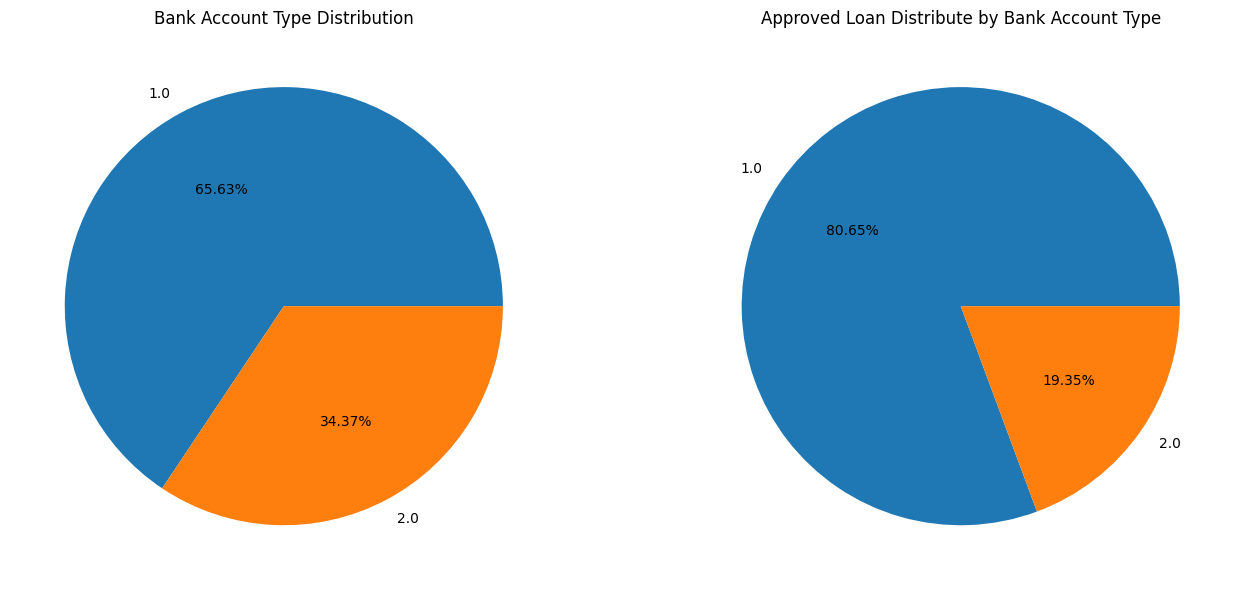

In [165]:
# Create a figure with two subplots, side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first pie chart
axes[0].pie(df_analysis['Bank Account Type'].value_counts(), labels=['1.0','2.0'], autopct='%1.2f%%')
axes[0].set_title('Bank Account Type Distribution')

# Plot the second pie chart
axes[1].pie(approve_df['Bank Account Type'].value_counts(), labels=['1.0','2.0'], autopct='%1.2f%%')
axes[1].set_title('Approved Loan Distribute by Bank Account Type')

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()

In [166]:
## Count Percentage
bank_account_type_count_by_loan = df_analysis.groupby(['Bank Account Type', 'class']).size().unstack(fill_value=0)

# Calculate the total count of customers
bank_account_type_total_count = bank_account_type_count_by_loan.sum(axis=1)

# # Calculate the percentage of loan by emp2
loan_percentage_by_bank_account_type = (bank_account_type_count_by_loan[1] / bank_account_type_total_count) * 100

# # Reset the index 
loan_percentage_by_bank_account_type = loan_percentage_by_bank_account_type.reset_index()

# # Rename columns
loan_percentage_by_bank_account_type.columns = ['Bank Account Type', 'Loan Approval Percentage']
print(loan_percentage_by_bank_account_type)

   Bank Account Type  Loan Approval Percentage
0                1.0                  2.104698
1                2.0                  0.963972


### Observations:
* 65% of applicants has bank account type 1.0
* 80% of approved loan application are from bank account type 1.
* Only 2.1% loan approved for bank account type 1.

## (13) Marketing Source Data Distribution (CATEGORICAL)

In [168]:
df_analysis['Marketing Source'].describe()

count    55752.000000
mean         3.123996
std          2.821080
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         28.000000
Name: Marketing Source, dtype: float64

In [172]:
df_analysis['Marketing Source'].value_counts()

Marketing Source
1     24706
4     19110
5      3588
2      2769
7      1232
6      1139
3       826
14      505
11      457
17      413
12      324
10      201
8       200
20      133
9        51
19       36
18       27
13       13
26        6
27        5
21        3
28        2
24        1
23        1
16        1
22        1
25        1
15        1
Name: count, dtype: int64

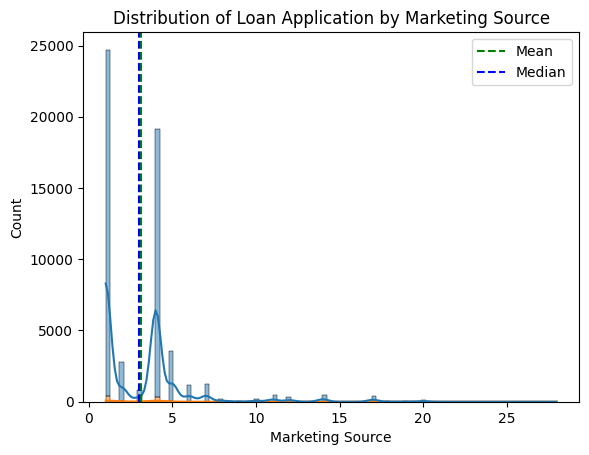

In [167]:
sns.histplot(x = 'Marketing Source', data = df_analysis, bins=100, hue='class', multiple='stack', kde=True)
plt.title('Distribution of Loan Application by Marketing Source')

# derive the line of mean and median and mode
plt.axvline(df_analysis['Marketing Source'].mean(), color='g', linestyle='--', label='Mean')
plt.axvline(df_analysis['Marketing Source'].median(), color='b', linestyle='--', label='Median')
plt.legend()
plt.show()

### Observations:
* Maximum marketing source no 1.

## (14) Marketing_Category1 Data Distribution (CATEGORICAL)

In [173]:
df_analysis['Marketing Category1'].value_counts()

Marketing Category1
2    23844
7    21183
3     9113
5      846
4      388
6      376
1        2
Name: count, dtype: int64

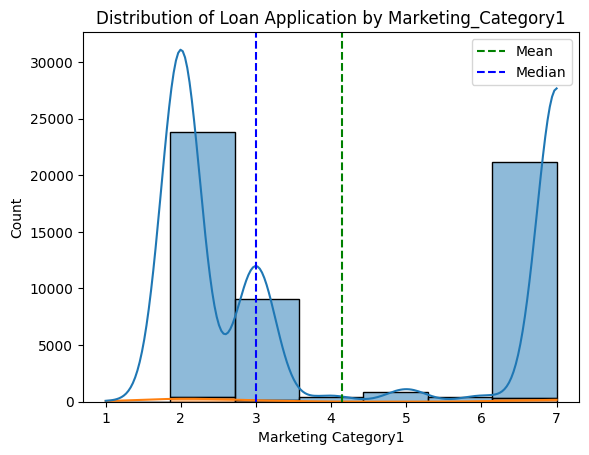

In [174]:
sns.histplot(x = 'Marketing Category1', data = df_analysis, bins=7, hue='class', multiple='stack', kde=True)
plt.title('Distribution of Loan Application by Marketing_Category1')

# derive the line of mean and median and mode
plt.axvline(df_analysis['Marketing Category1'].mean(), color='g', linestyle='--', label='Mean')
plt.axvline(df_analysis['Marketing Category1'].median(), color='b', linestyle='--', label='Median')
plt.legend()
plt.show()

In [175]:
## Count Percentage
mrkt1_count_by_loan = df_analysis.groupby(['Marketing Category1', 'class']).size().unstack(fill_value=0)

# Calculate the total count of customers
mrkt1_total_count = mrkt1_count_by_loan.sum(axis=1)

# # Calculate the percentage of loan by emp2
loan_percentage_by_mrkt1 = (mrkt1_count_by_loan[1] / mrkt1_total_count) * 100

# # Reset the index 
loan_percentage_by_mrkt1 = loan_percentage_by_mrkt1.reset_index()

# # Rename columns
loan_percentage_by_mrkt1.columns = ['Marketing Category1', 'Loan Approval Percentage']
print(loan_percentage_by_mrkt1)

   Marketing Category1  Loan Approval Percentage
0                    1                  0.000000
1                    2                  1.761449
2                    3                  1.305827
3                    4                  0.000000
4                    5                  1.418440
5                    6                  1.595745
6                    7                  1.354860


### Observations:
* Loan approval rate for marketing_category 1 is almost similar for all category 0-1.5%
* Marketing category 1 might not be the main factor for loan approval

## (15) Marketing_Category2 Data Distribution (CATEGORICAL)

In [176]:
df_analysis['Marketing Category2'].value_counts()

Marketing Category2
0     18630
10    10712
2     10711
7      9533
4      6166
Name: count, dtype: int64

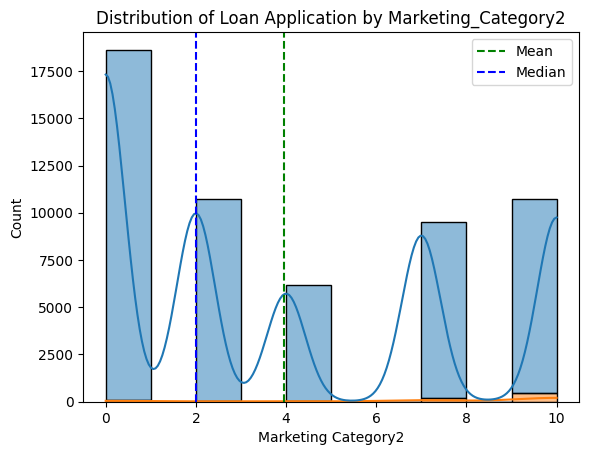

In [177]:
sns.histplot(x = 'Marketing Category2', data = df_analysis, bins=10, hue='class', multiple='stack', kde=True)
plt.title('Distribution of Loan Application by Marketing_Category2')

# derive the line of mean and median and mode
plt.axvline(df_analysis['Marketing Category2'].mean(), color='g', linestyle='--', label='Mean')
plt.axvline(df_analysis['Marketing Category2'].median(), color='b', linestyle='--', label='Median')
plt.legend()
plt.show()

In [178]:
## Count Percentage
mrkt2_count_by_loan = df_analysis.groupby(['Marketing Category2', 'class']).size().unstack(fill_value=0)

# Calculate the total count of customers
mrkt2_total_count = mrkt2_count_by_loan.sum(axis=1)

# # Calculate the percentage of loan by emp2
loan_percentage_by_mrkt2 = (mrkt2_count_by_loan[1] / mrkt2_total_count) * 100

# # Reset the index 
loan_percentage_by_mrkt2 = loan_percentage_by_mrkt2.reset_index()

# # Rename columns
loan_percentage_by_mrkt2.columns = ['Marketing Category2', 'Loan Approval Percentage']
print(loan_percentage_by_mrkt2)

   Marketing Category2  Loan Approval Percentage
0                    0                  0.542136
1                    2                  0.317431
2                    4                  0.924424
3                    7                  1.940627
4                   10                  4.359597


### Observations:
* Loan approval rate for marketing_category 2 type 10 is tha highest at 4.3%.
* Applicant from Marketing_cat2 type 10 might be the best approach for loan approval, although most of applicatn are using type 0

## (16) Current Loan Installment Data Distribution (NUMERICAL)

In [182]:
df_analysis['Current Loan Installment'].value_counts().head(10)

Current Loan Installment
0.0       37295
525.0      1694
1050.0     1099
315.0      1010
420.0       778
210.0       693
630.0       548
840.0       541
1575.0      508
735.0       478
Name: count, dtype: int64

In [183]:
df_analysis['Current Loan Installment'].describe()

count     55711.000000
mean        379.310058
std        2638.713048
min           0.000000
25%           0.000000
50%           0.000000
75%         367.500000
max      572708.325000
Name: Current Loan Installment, dtype: float64

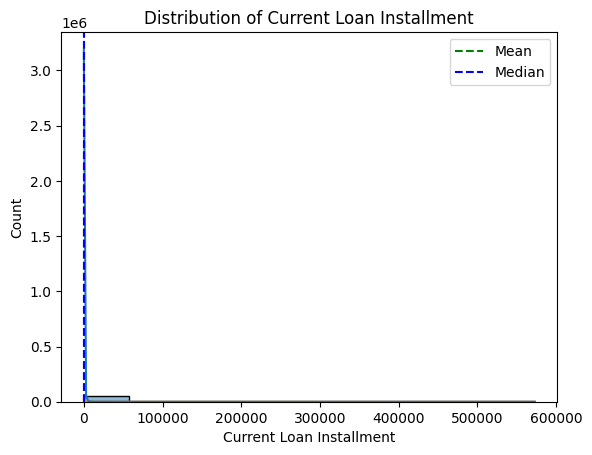

In [184]:
sns.histplot(x = 'Current Loan Installment', data = df_analysis, bins=10, hue='class', multiple='stack', kde=True)
plt.title('Distribution of Current Loan Installment')

# derive the line of mean and median and mode
plt.axvline(df_analysis['Current Loan Installment'].mean(), color='g', linestyle='--', label='Mean')
plt.axvline(df_analysis['Current Loan Installment'].median(), color='b', linestyle='--', label='Median')
plt.legend()
plt.show()

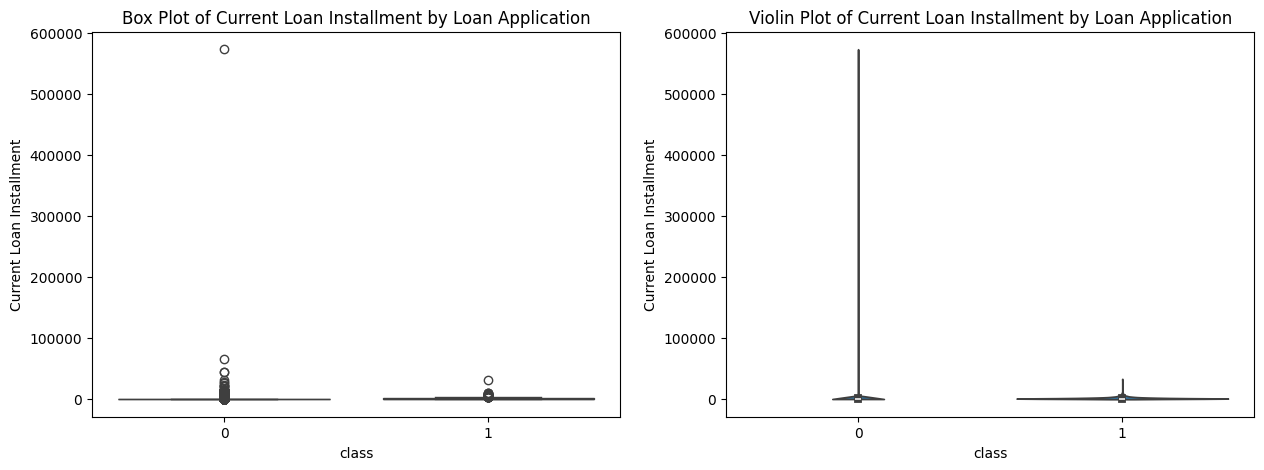

In [185]:
# Check for outliers
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x ='class' , y = 'Current Loan Installment', data=df_analysis ,ax=ax[0])
ax[0].set_title('Box Plot of Current Loan Installment by Loan Application')

sns.violinplot(x ='class' , y = 'Current Loan Installment', data=df_analysis ,ax=ax[1])
ax[1].set_title('Violin Plot of Current Loan Installment by Loan Application')
plt.show()

In [186]:
# Check how many rows having value above certain range
len(df_analysis[df_analysis['Current Loan Installment'] >= 50000])

2

### Observations:
* Majority loan applicants (more than 50%) has 0 current loan installment.
* Loan applicants has mean of 379.255597 installment.
* There are outliers where with max loan installment of 572708.325000. Upon deep check, I discorvered just 2 rows having value above 50K. For test data, there are no value above 20K.
* In the real world scenario, there might also be such outliers. Removing outliers might affect the model's ability to generalize to real-world scenarios where similar outliers exist.

## (17) Requested Loan Amount Data Distribution (NUMERICAL)

In [187]:
df_analysis['Requested Loan Amount'].describe()

count     33629.000000
mean      41437.704065
std       32322.161373
min        5250.000000
25%       21000.000000
50%       31500.000000
75%       52500.000000
max      315000.000000
Name: Requested Loan Amount, dtype: float64

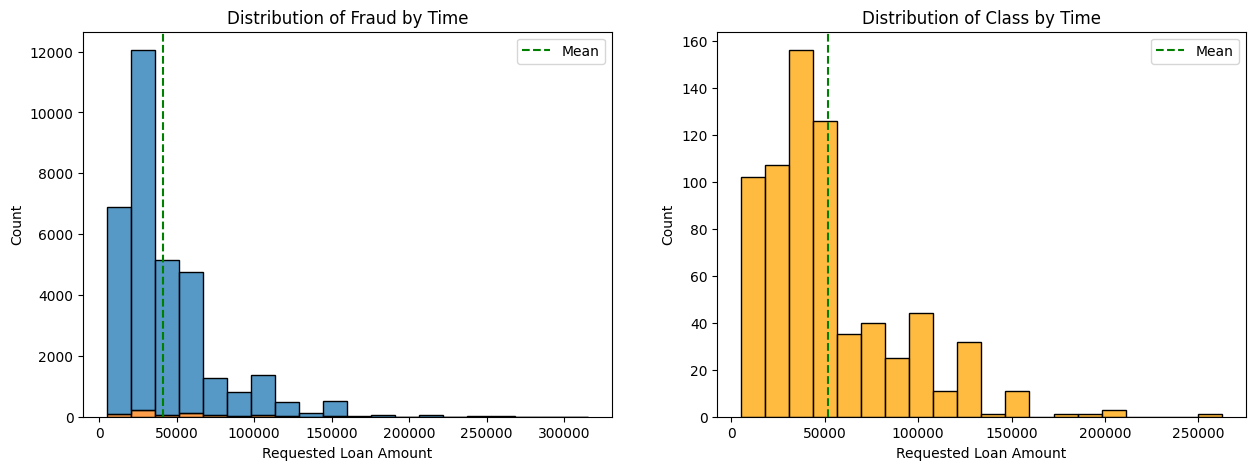

In [188]:
# histogram for age distribution
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Plot with Bin to have a better visualization of the data. Without bin, there might be misunderstanding of the data.
sns.histplot(x = 'Requested Loan Amount', data=df_analysis, bins=20,hue='class', multiple='stack', kde=False, ax=ax[0])
ax[0].set_title('Distribution of Fraud by Time')
# derive the line of mean
ax[0].axvline(df_analysis['Requested Loan Amount'].mean(), color='g', linestyle='--', label='Mean')
ax[0].legend()

sns.histplot(x = 'Requested Loan Amount', data = approve_df, bins=20, multiple='stack', kde=False, ax=ax[1], color='orange')
ax[1].set_title('Distribution of Class by Time')
ax[1].axvline(approve_df['Requested Loan Amount'].mean(), color='g', linestyle='--', label='Mean')
ax[1].legend()
plt.show()

In [189]:
approve_df['Requested Loan Amount'].describe()

count       696.000000
mean      51460.560345
std       37860.109602
min        5250.000000
25%       21000.000000
50%       42000.000000
75%       67200.000000
max      262500.000000
Name: Requested Loan Amount, dtype: float64

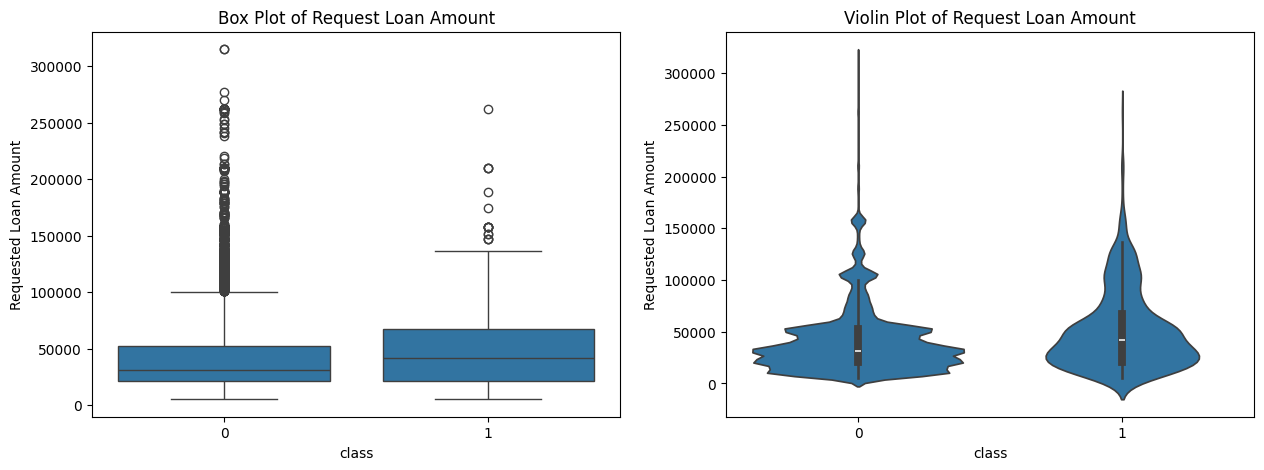

In [190]:
# Check for outliers
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x ='class' , y = 'Requested Loan Amount', data=df_analysis ,ax=ax[0])
ax[0].set_title('Box Plot of Request Loan Amount')

sns.violinplot(x ='class' , y = 'Requested Loan Amount', data=df_analysis ,ax=ax[1])
ax[1].set_title('Violin Plot of Request Loan Amount')
plt.show()

### Observations:
* Majority of loan applicant request for loan below 150,000
* Mean approved Request Loan Amount is 51460.560345.
* There are outliers, however, i believe the outliers represent the real world scenario data. Therefore, i will not remove the outliers but need to handle the outliers differently. Maybe do in transformation or others.


## (18) Loan Repayment (Years) Data Distribution (CATEGORICAL)

In [192]:
df_analysis['Loan Repayment (Years)'].value_counts()

Loan Repayment (Years)
5.0    13334
4.0     9757
3.0     5661
2.0     3365
1.0     1512
Name: count, dtype: int64

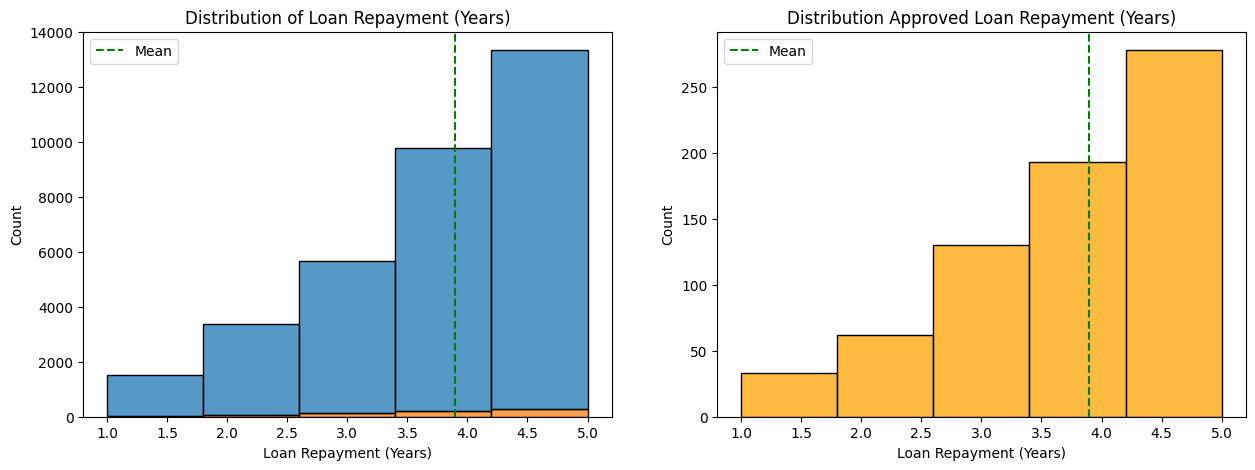

In [193]:
# histogram for age distribution
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Plot with Bin to have a better visualization of the data. Without bin, there might be misunderstanding of the data.
sns.histplot(x = 'Loan Repayment (Years)', data=df_analysis, bins=5,hue='class', multiple='stack', kde=False, ax=ax[0])
ax[0].set_title('Distribution of Loan Repayment (Years)')
# derive the line of mean
ax[0].axvline(df_analysis['Loan Repayment (Years)'].mean(), color='g', linestyle='--', label='Mean')
ax[0].legend()

sns.histplot(x = 'Loan Repayment (Years)', data = approve_df, bins=5, multiple='stack', kde=False, ax=ax[1], color='orange')
ax[1].set_title('Distribution Approved Loan Repayment (Years)')
ax[1].axvline(approve_df['Loan Repayment (Years)'].mean(), color='g', linestyle='--', label='Mean')
ax[1].legend()
plt.show()

In [194]:
labels = df_analysis['Loan Repayment (Years)'].value_counts().index.tolist()
labels

[5.0, 4.0, 3.0, 2.0, 1.0]

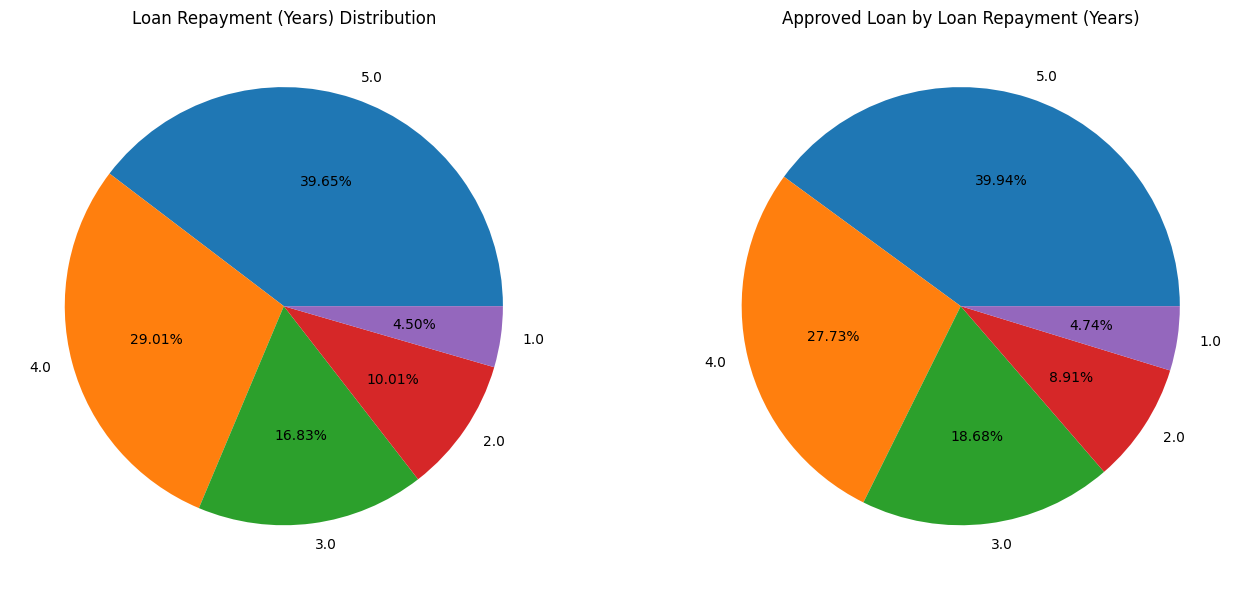

In [195]:
# Create a figure with two subplots, side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first pie chart
axes[0].pie(df_analysis['Loan Repayment (Years)'].value_counts(), labels=labels, autopct='%1.2f%%')
axes[0].set_title('Loan Repayment (Years) Distribution')

# Plot the second pie chart
axes[1].pie(approve_df['Loan Repayment (Years)'].value_counts(), labels=labels, autopct='%1.2f%%')
axes[1].set_title('Approved Loan by Loan Repayment (Years)')

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()

In [196]:
## Count Percentage
years_count_by_loan = df_analysis.groupby(['Loan Repayment (Years)', 'class']).size().unstack(fill_value=0)

# Calculate the total count of customers
years_total_count = years_count_by_loan.sum(axis=1)

# # Calculate the percentage of loan by emp2
loan_percentage_by_years = (years_count_by_loan[1] / years_total_count) * 100

# # Reset the index 
loan_percentage_by_years = loan_percentage_by_years.reset_index()

# # Rename columns
loan_percentage_by_years.columns = ['Loan Repayment (Years)', 'Loan Approval Percentage']
print(loan_percentage_by_years)

   Loan Repayment (Years)  Loan Approval Percentage
0                     1.0                  2.182540
1                     2.0                  1.842496
2                     3.0                  2.296414
3                     4.0                  1.978067
4                     5.0                  2.084896


### Observations:
* Majority (39.65%) loan applicant request for 5 years loan repayment duration.
* just 4% request for 1 year loan repayment duration.
* Majority approved loan approval is for 5 years repayment duration. This is quite logic, since longer loan duration give banks higher interest value.
* However the approval rate does not really effected by the loan repaument years, about 2% for all years.


## (19) Interest Rate Data Distribution (NUMERICAL)

In [198]:
df_analysis['Interest Rate'].value_counts()

Interest Rate
19.6000    3076
14.5530    1291
30.8700    1099
13.7102    1079
14.9450     985
           ... 
20.0900       2
15.2880       1
14.2590       1
14.8470       1
15.1802       1
Name: count, Length: 72, dtype: int64

In [199]:
df_analysis['Interest Rate'].describe()

count    17819.000000
mean        18.851619
std          5.746168
min         11.750200
25%         14.945000
50%         17.640000
75%         19.600000
max         36.260000
Name: Interest Rate, dtype: float64

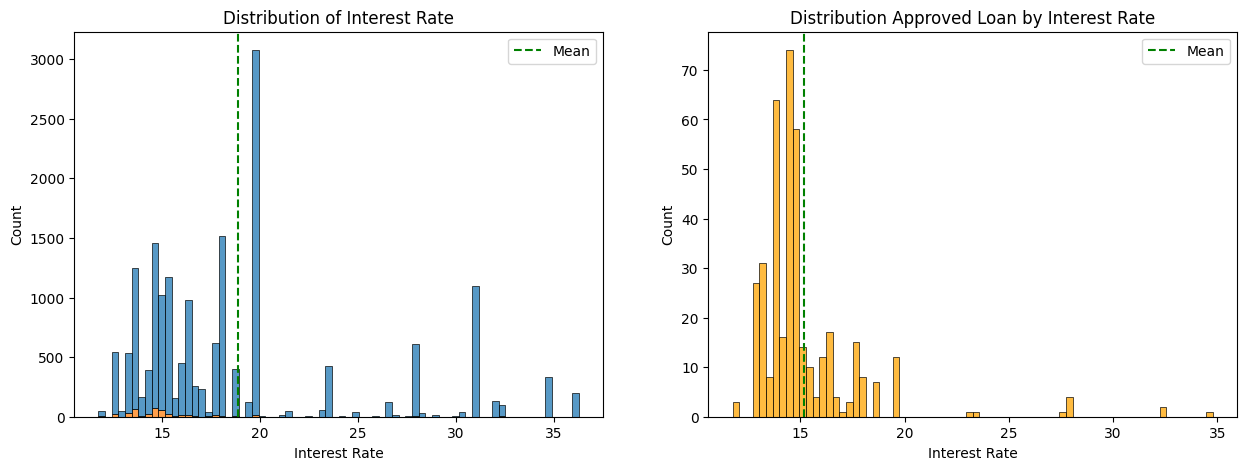

In [200]:
# histogram for age distribution
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Plot with Bin to have a better visualization of the data. Without bin, there might be misunderstanding of the data.
sns.histplot(x = 'Interest Rate', data=df_analysis, bins=72, hue='class', multiple='stack', kde=False, ax=ax[0])
ax[0].set_title('Distribution of Interest Rate')
# derive the line of mean
ax[0].axvline(df_analysis['Interest Rate'].mean(), color='g', linestyle='--', label='Mean')
ax[0].legend()

sns.histplot(x = 'Interest Rate', data = approve_df, bins=72, multiple='stack', kde=False, ax=ax[1], color='orange')
ax[1].set_title('Distribution Approved Loan by Interest Rate')
ax[1].axvline(approve_df['Interest Rate'].mean(), color='g', linestyle='--', label='Mean')
ax[1].legend()
plt.show()

In [201]:
approve_df['Interest Rate'].describe()

count    398.000000
mean      15.186701
std        2.731564
min       11.750200
25%       13.710200
50%       14.553000
75%       15.435000
max       34.790000
Name: Interest Rate, dtype: float64

### Observations:
* Majority of approved loan has interest rate between 5-20%.
* Although majority of loan applicants offered with 20% interest rate, the approval rate is low comprate to 15% interest rate.


## (20) Requested Loan Installment Data Distribution (NUMERICAL)

In [202]:
df_analysis['Requested Loan Installment'].value_counts()

Requested Loan Installment
0.000       37295
525.000      1694
1050.000     1099
315.000      1010
420.000       778
            ...  
609.525         1
436.275         1
269.010         1
273.735         1
145.845         1
Name: count, Length: 2802, dtype: int64

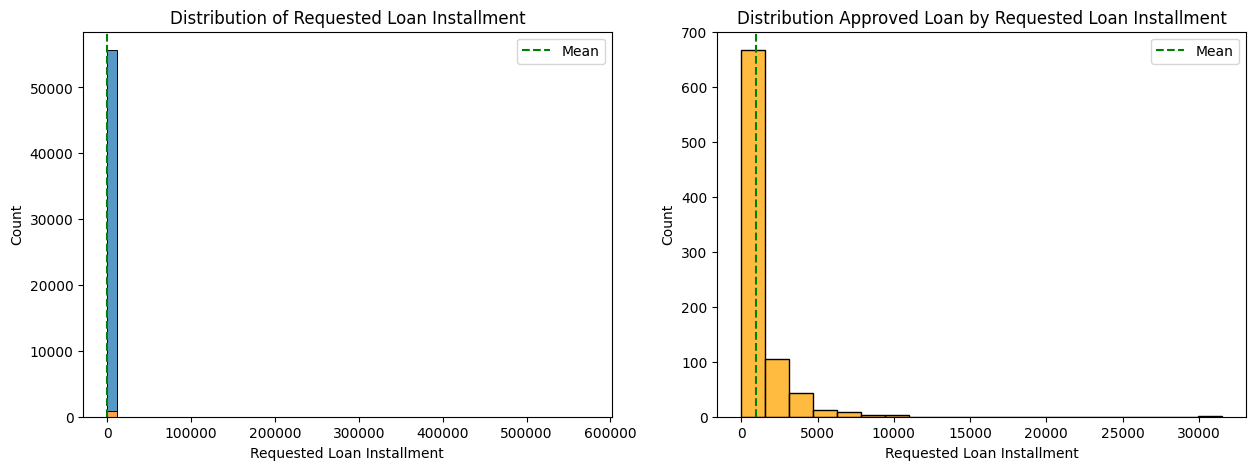

In [203]:
# histogram for age distribution
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Plot with Bin to have a better visualization of the data. Without bin, there might be misunderstanding of the data.
sns.histplot(x = 'Requested Loan Installment', data=df_analysis, bins=50, hue='class', multiple='stack', kde=False, ax=ax[0])
ax[0].set_title('Distribution of Requested Loan Installment')
# derive the line of mean
ax[0].axvline(df_analysis['Requested Loan Installment'].mean(), color='g', linestyle='--', label='Mean')
ax[0].legend()

sns.histplot(x = 'Requested Loan Installment', data = approve_df, bins=20, multiple='stack', kde=False, ax=ax[1], color='orange')
ax[1].set_title('Distribution Approved Loan by Requested Loan Installment')
ax[1].axvline(approve_df['Requested Loan Installment'].mean(), color='g', linestyle='--', label='Mean')
ax[1].legend()
plt.show()

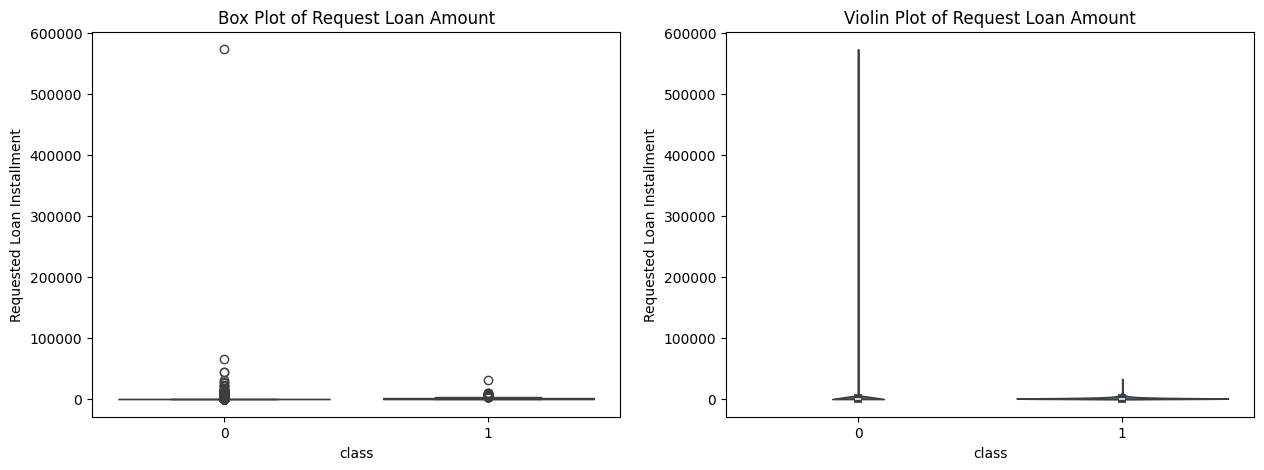

In [204]:
# Check for outliers
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x ='class' , y = 'Requested Loan Installment', data=df_analysis ,ax=ax[0])
ax[0].set_title('Box Plot of Request Loan Amount')

sns.violinplot(x ='class' , y = 'Requested Loan Installment', data=df_analysis ,ax=ax[1])
ax[1].set_title('Violin Plot of Request Loan Amount')
plt.show()

In [205]:
df_analysis['Requested Loan Installment'].describe()

count     55711.000000
mean        379.310058
std        2638.713048
min           0.000000
25%           0.000000
50%           0.000000
75%         367.500000
max      572708.325000
Name: Requested Loan Installment, dtype: float64

In [206]:
# Check how many rows having value above certain range
len(df_analysis[df_analysis['Requested Loan Installment'] >= 30000])

6

### Observations:
* High applicants (37k) request for loan installment of 0! This is not logic. You can not expect to get loan without installment payment.
* There is outliers in the train data. Maybe i can remove the illogical value. (e.g. value above 30k)
* Mean approved loan has loan installemnt of 943.376922

## O1. Class Data Distribution()

In [207]:
# Count values of selected columns
df_analysis['class'].value_counts()

# class : Loan Approval Status (Yes=1, No=0)

class
0    54908
1      844
Name: count, dtype: int64

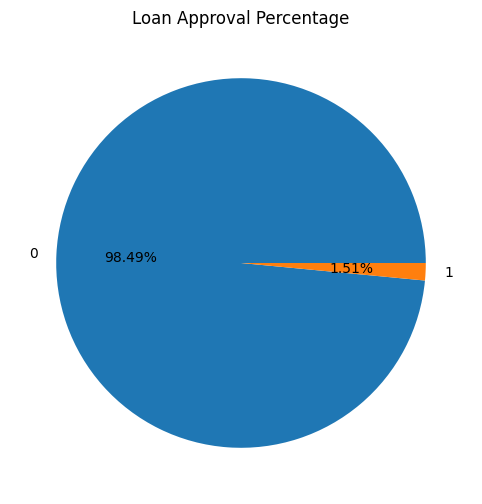

In [208]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df_analysis['class'].value_counts(), labels=['0','1'], autopct='%1.2f%%')
plt.title('Loan Approval Percentage')
plt.show()

### Observations:
* Data distribution of the target variables is not balance. Only 844 for loan approved data and 54908 for not approve.
* Might need to experiment with Undersampling, SMOTE and Mix mode dataset for training.